## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Obtaining The Data

## Import data & Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [10]:
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 50)

## Preview Data & Analyze dtypes

In [11]:
data = pd.read_csv('kc_house_data.csv')
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           NaN    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

## Null values

In [12]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**We have 3 columns that need to be cleaned of Null values:**

---
* **Waterfront: 2376**
* **View: 63**
* **Yr_Renovated: 3842**

## Visualize Continuous& Categorical Features Against Price

In [13]:
cont_vars = ['price','date','sqft_living','sqft_lot','sqft_basement','sqft_above','sqft_living15','sqft_lot15','yr_built','yr_renovated'] 
cat_vars = ['price','bedrooms','bathrooms','floors','waterfront','view','condition','grade', 'zipcode']

data_cont = data[cont_vars]
data_cat = data[cat_vars]

In [14]:
# sns.pairplot(data_cont);

In [15]:
# sns.pairplot(data_cat);

## Initial Multicollinearity Check

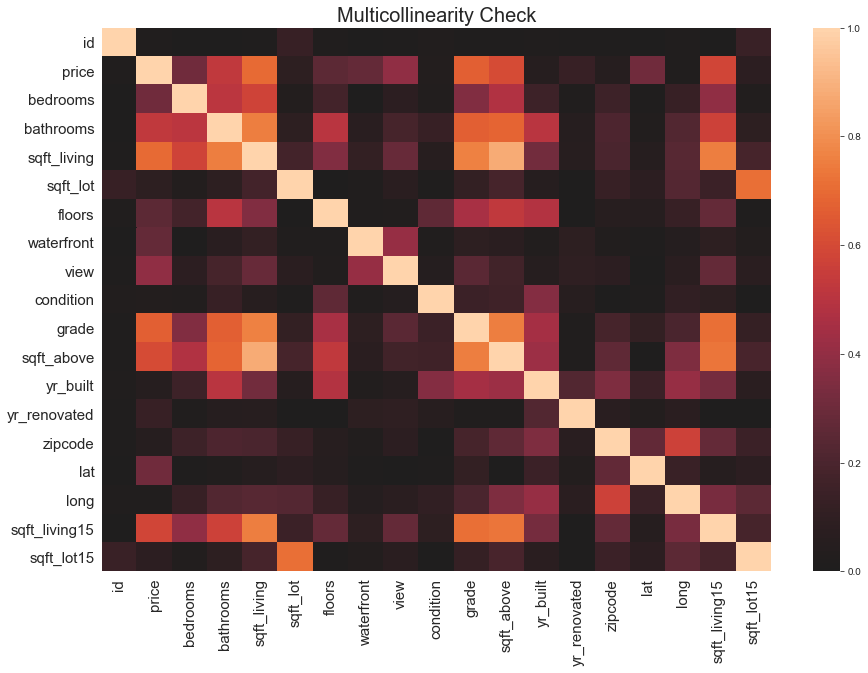

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(data.corr()), center=0);

plt.title('Multicollinearity Check', fontsize=20);
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

### Multicollinearity Observations

**There are only 1 pair of features that have a correlation above 0.80:**

* **sqft_living & sqft_above @ (.88)**

**We will drop sqft_above from the models to avoid multicollinearity issues.**

## Identify Feature Outliers

In [17]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

### Outlier Observations

**Features with Outliers**

---
**Median vs Mean Difference**

**1. price: -400,000**

**2. sqft_living: ~ -200**

**3. sqft_lot: -34,000**

**4. condition: -0.4**

**5. sqft_above: -200+**

**6. sqft_living15: -150**

**7. sqft_lot15: -5000**

# Clean Data

## Convert Date Feature

In [18]:
df = data.copy()
df['date'] = pd.to_datetime(df['date'])

## Convert Sqft_Basement Feature

In [19]:
df['sqft_basement'] = df['sqft_basement'].astype(str)
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
850.0        72
910.0        71
940.0        71
770.0        71
880.0        69
290.0        69
440.0        69
1200.0       69
520.0        68
350.0        68
630.0        66
920.0        66
960.0        65
730.0        65
430.0        64
740.0        64
640.0        63
1010.0       63
760.0        63
280.0        62
560.0        62
570.0        62
950.0        62
340.0        62
820.0        62
460.0        61
790.0        61
310.0        58
1060.0       58
980.0        57
830.0        56
810.0        55
1040.0  

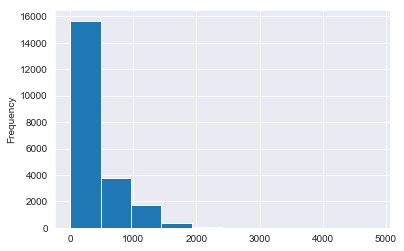

In [20]:
def str_changer(value, string=None, replacement=None):
    if value == string:
        value = replacement
    return value

df['sqft_basement'] = df['sqft_basement'].map(lambda x: str_changer(value=x,string='?', replacement='1'))
df['sqft_basement'] = df['sqft_basement'].astype(float)

df['sqft_basement'].plot.hist();

##  Clean Waterfront Feature

**We need to decide what to do with the NaN values for this feature.  Let's take a closer look at the data to choose the optimal course of action!**

In [21]:
print(df['waterfront'].value_counts(dropna=False))
print('The total number of NaN values for Waterfront is {}'.format(df['waterfront'].isna().sum()))

 0.0    19075
NaN      2376
 1.0      146
Name: waterfront, dtype: int64
The total number of NaN values for Waterfront is 2376


In [22]:
df['waterfront'] = df['waterfront'].fillna(0.5)
print(df['waterfront'].value_counts())

0.0    19075
0.5     2376
1.0      146
Name: waterfront, dtype: int64


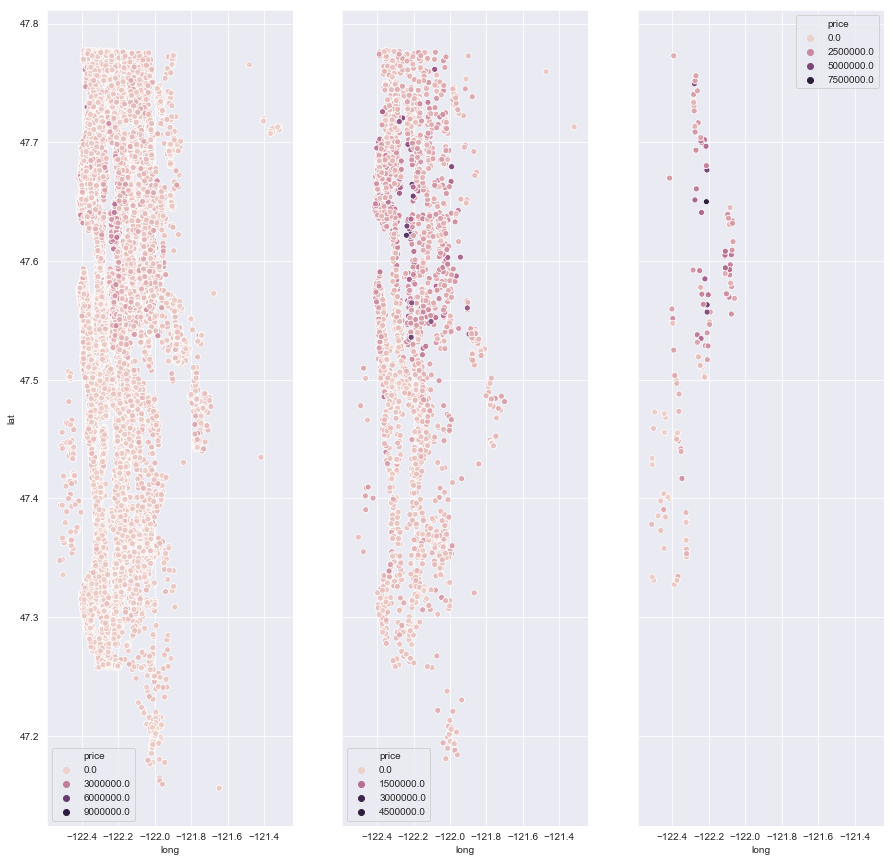

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,15), sharey=True, sharex=True)

sns.scatterplot(x='long', y='lat', hue='price', data=df[df['waterfront'] == 0], ax=ax1);
sns.scatterplot(x='long', y='lat', hue='price', data=df[df['waterfront'] == 0.5], ax=ax2);
sns.scatterplot(x='long', y='lat', hue='price', data=df[df['waterfront'] == 1], ax=ax3);

**Not much to make from these visualizations, lets have a look at some more data using the groupby method.**

In [24]:
print('Number of houses without a waterfront or view: {}'.format(
    df[(df['waterfront'] == 0 ) & (df['view'] == 0)].shape[0]))
print('Number of houses without a waterfront and have 1 view: {}'.format(
    df[(df['waterfront'] == 0 ) & (df['view'] == 1)].shape[0]))
print('Number of houses without a waterfront and more than 1 view: {}'.format(
    df[(df['waterfront'] == 0 ) & (df['view'] > 1)].shape[0]))
print('----------------------------------------------------')
print('Number of houses with a waterfront but no view: {}'.format(
    df[(df['waterfront'] == 1 ) & (df['view'] == 0)].shape[0]))
print('Number of houses with a waterfront and have 1 view: {}'.format(
    df[(df['waterfront'] == 1 ) & (df['view'] == 1)].shape[0]))
print('Number of houses with a waterfront and more than 1 view: {}'.format(
    df[(df['waterfront'] == 1 ) & (df['view'] > 1)].shape[0]))
print('----------------------------------------------------')
print('Number of houses with UNKNOWN waterfront and no view: {}'.format(
    df[(df['waterfront'] == 0.5 ) & (df['view'] == 0)].shape[0]))
print('Number of houses with UNKNOWN waterfront and have 1 view: {}'.format(
    df[(df['waterfront'] == 0.5 ) & (df['view'] == 1)].shape[0]))
print('Number of houses with UNKNOWN waterfront and more than 1 view: {}'.format(
    df[(df['waterfront'] == 0.5 ) & (df['view'] > 1)].shape[0]))

Number of houses without a waterfront or view: 17312
Number of houses without a waterfront and have 1 view: 290
Number of houses without a waterfront and more than 1 view: 1417
----------------------------------------------------
Number of houses with a waterfront but no view: 0
Number of houses with a waterfront and have 1 view: 1
Number of houses with a waterfront and more than 1 view: 144
----------------------------------------------------
Number of houses with UNKNOWN waterfront and no view: 2110
Number of houses with UNKNOWN waterfront and have 1 view: 39
Number of houses with UNKNOWN waterfront and more than 1 view: 221


In [25]:
likely_no_wtr_df = df[(df['waterfront'] == 0.5) & (df['view'] == 0)]
likely_wtr_df = df[(df['waterfront'] == 0.5) & (df['view'] > 1)]

for index in list(likely_no_wtr_df.index):
    df.loc[index, 'waterfront'] = 0    
    
for index in list(likely_wtr_df.index):
    df.loc[index, 'waterfront'] = 1

    
print(df.shape)
df.head()

(21597, 21)


id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
1          400.0      1951        1991.0    98125  47.7210 -122.319   
2            0.0      1933           NaN    98028  47.7379 -122.233   
3          910.0      1965           0.0    98136  47.5208 -122.393   
4            0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [26]:
df['waterfront'].value_counts()

0.0    21185
1.0      367
0.5       45
Name: waterfront, dtype: int64

**We have taken an educated guess on assigning most of these unknown (0.5) values and we are left with only a few remaining rows that are still unclear.  This is an acceptable loss should we choose to drop these later.**

## Clean Yr_Renovated Feature

**Here we are going to set the "Unknown" renovation status value to the year 1800.  This will be used later on during the feature engineering stages.**

In [27]:
df['yr_renovated'] = df['yr_renovated'].fillna(1800)
df['yr_renovated'].value_counts().head()

0.0       17011
1800.0     3842
2014.0       73
2003.0       31
2013.0       31
Name: yr_renovated, dtype: int64

##  Clean View Feature

In [28]:
df['view'] = df['view'].fillna(0.5)
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
0.5       63
Name: view, dtype: int64

# EDA & Feature Engineering

In [29]:
df_eda = df.copy()

## Bin Categorical Features for Further Exploration

In [30]:
def bathroom_binner(value):
    if value <= 1.5:
        return '1_5_or_less'
    elif value > 1.5 and value < 3:
        return '2_to_3'
    else:
        return '3_or_more'
    
def bedroom_binner(value):
    if value <= 3:
        return '3_or_less'
    else:
        return '4_or_more'
    
def grade_binner(value):
    if value <= 6:
        return '6_or_less'
    elif value == 7:
        return '7'
    elif value == 8:
        return '8'
    elif value == 9:
        return '9'
    else:
        return 'more_than_10'
    
def condition_binner(value):
    if value < 3:
        return '2_or_less'
    elif value == 3:
        return '3'
    else:
        return 'more_than_3'

def floor_binner(value):
    if value == 1:
        return '1_floor'
    elif value == 2 or value == 3:
        return '2_or_more'
    else:
        return 'split'    
    
df_eda['bathroom_bins'] = df_eda['bathrooms'].map(bathroom_binner)
df_eda['bedroom_bins'] = df_eda['bedrooms'].map(bedroom_binner)
df_eda['grade_bins'] = df_eda['grade'].map(grade_binner)
df_eda['cond_bins'] = df_eda['condition'].map(condition_binner)
df_eda['floor_bins'] = df_eda['floors'].map(floor_binner)
df_eda.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
1          400.0      1951        1991.0    98125  47.7210 -122.319   
2            0.0      1933        1800.0    98028  47.7379 -122.233   
3          910.0      1965           0.0    98136  47.5208 -122.393   
4            0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15 bathroom_bins bedroom_bins grade_bins  \
0           1340        5650   1_5_or_less    3_or_less          7   
1           1690        7639        2_to_3    3_or_less          7   
2           2720        8062   1_5_or_less    3_or_less  6_or_less   
3           1360        5000     3_or_more    4_or_more          7   
4           1800        7503        2_to_3    3_or_less          8   

     cond_bins floor_bins  
0            3    1_floor  
1            3  2_or_more  
2            3    1_floor  
3  more_than_3    1_floor  
4            3    1_floor

## Binary Features

In [31]:
def binary_view_converter(value):
    if value > 0:
        return 1
    else:
        return 0
    
def binary_basement_converter(value):
    if value > 1:
        return 1
    else:
        return 0
        
df_eda['view_binar'] = df_eda['view'].map(binary_view_converter)
df_eda['view_binar'] = df_eda['view_binar'].fillna(0)

df_eda['basement_binar'] = df_eda['sqft_basement'].map(binary_basement_converter)

df_eda.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
1          400.0      1951        1991.0    98125  47.7210 -122.319   
2            0.0      1933        1800.0    98028  47.7379 -122.233   
3          910.0      1965           0.0    98136  47.5208 -122.393   
4            0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15 bathroom_bins bedroom_bins grade_bins  \
0           1340        5650   1_5_or_less    3_or_less          7   
1           1690        7639        2_to_3    3_or_less          7   
2           2720        8062   1_5_or_less    3_or_less  6_or_less   
3           1360        5000     3_or_more    4_or_more          7   
4           1800        7503        2_to_3    3_or_less          8   

     cond_bins floor_bins  view_binar  basement_binar  
0            3    1_floor           0               0  
1            3  2_or_more           0               1  
2            3    1_floor           0               0  
3  more_than_3    1_floor           0               1  
4            3    1_floor           0               0

## Add built_yrs_ago Feature

In [32]:
df_eda['built_yrs_ago'] = df_eda['date'].dt.year - df_eda['yr_built']
df_eda.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
1          400.0      1951        1991.0    98125  47.7210 -122.319   
2            0.0      1933        1800.0    98028  47.7379 -122.233   
3          910.0      1965           0.0    98136  47.5208 -122.393   
4            0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15 bathroom_bins bedroom_bins grade_bins  \
0           1340        5650   1_5_or_less    3_or_less          7   
1           1690        7639        2_to_3    3_or_less          7   
2           2720        8062   1_5_or_less    3_or_less  6_or_less   
3           1360        5000     3_or_more    4_or_more          7   
4           1800        7503        2_to_3    3_or_less          8   

     cond_bins floor_bins  view_binar  basement_binar  built_yrs_ago  
0            3    1_floor           0               0             59  
1            3  2_or_more           0               1             63  
2            3    1_floor           0               0             82  
3  more_than_3    1_floor           0               1             49  
4            3    1_floor           0               0             28

## Add Count Feature for Future Exploration

In [33]:
df_eda['count'] = 1

## Add City & Population Features

**Questions:**

**1. Which kinds of housing conditions exist in each city?**

**2. Which cities are more or less popular for development?**

**3. How should population fit into this decision?**

https://www.zip-codes.com/county/wa-king.asp

### Scrape City & Population Data

Text(0.5, 0, 'LONGTITUDE')

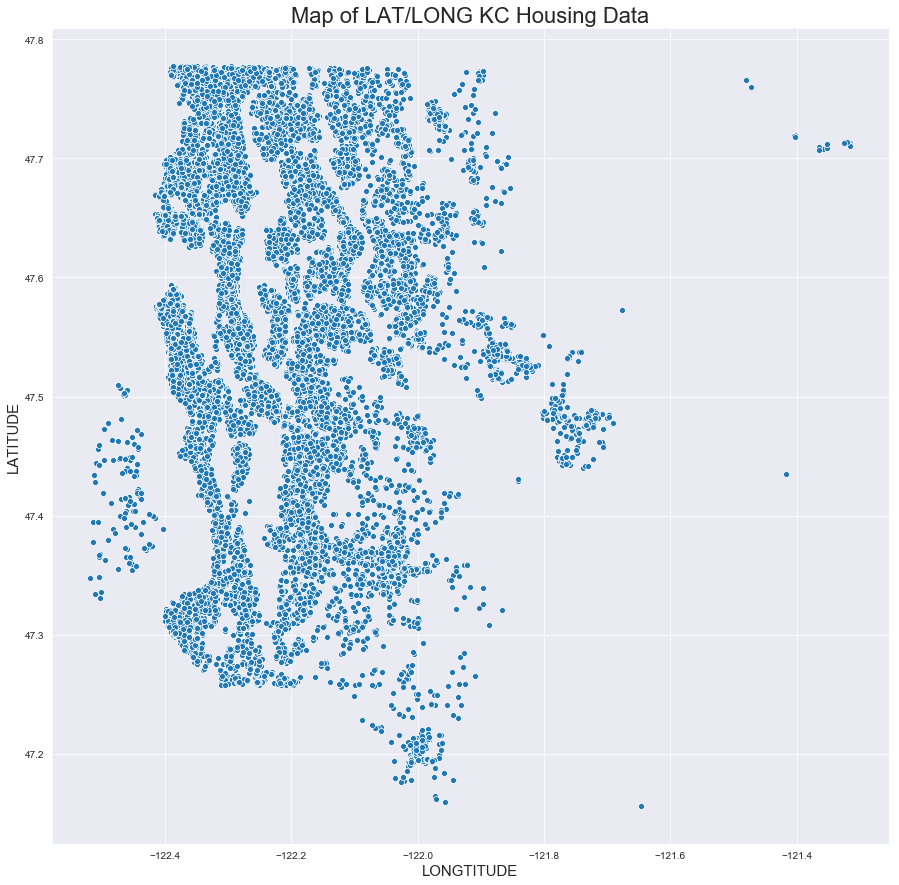

In [34]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='long', y='lat', data=df_eda);

plt.title('Map of LAT/LONG KC Housing Data', fontsize=22)
plt.ylabel('LATITUDE', fontsize=15)
plt.xlabel('LONGTITUDE', fontsize=15)

In [35]:
#Scrape code from KC municipal website to assign citys rather than zipcodes and optimize our featuers.
from bs4 import BeautifulSoup
import requests

In [36]:
html_page = requests.get('https://www.zip-codes.com/county/wa-king.asp')
soup = BeautifulSoup(html_page.content, 'html.parser')

warning = soup.find('table', border='0')

zip_city_list = warning.find_all('td', class_='label')[1:]
zip_city_list = list(zip_city_list)

temp = []
for zip in zip_city_list:
    temp.append(str(zip)[114:127])
zip_city_clean = temp
zip_city_clean = [x.split(',') for x in zip_city_clean]

pop_list = warning.find_all('td', class_='info')
pop_list = list(pop_list)[7:]

In [37]:
temp_pop = []
print(len(pop_list)//5)
count=0
for pop in range(120):        
    temp_pop.append(str(pop_list[count])[17:23])
    count +=5
pop_list = list(temp_pop)

119


In [38]:
zip_code_df = pd.DataFrame()

zip_code_df['zip_code'] = [int(x[0]) for x in zip_city_clean]
zip_code_df['city'] = [str(x[1].replace(' ','')) for x in zip_city_clean]
zip_code_df['zip_population'] = [str(x) for x in pop_list]

print(len(zip_code_df))
zip_code_df.head()


120


zip_code    city zip_population
0     98001  AUBURN         31,911
1     98002  AUBURN         31,647
2     98003  FEDERA         44,151
3     98004  BELLEV         27,946
4     98005  BELLEV         17,714

In [39]:
#drop PO boxs here
def KC_zip_pop_cleaner(string):            
    count = -1
    for letter in string:
        if letter == '>' or letter == 'd' or letter == '<' or letter == 't' or letter == 'n' or letter == '/' or letter == ',':
            string = string.replace(letter, '')
        else:
            continue
    return int(string)
zip_code_df['zip_population'] = zip_code_df['zip_population'].map(KC_zip_pop_cleaner)
zip_code_df = zip_code_df[zip_code_df['zip_population'] != 0]

zip_code_df = zip_code_df.reset_index().drop('index', axis=1)
print(len(zip_code_df))
zip_code_df.head()

81


zip_code    city  zip_population
0     98001  AUBURN           31911
1     98002  AUBURN           31647
2     98003  FEDERA           44151
3     98004  BELLEV           27946
4     98005  BELLEV           17714

In [40]:
zip_code_clean = zip_code_df.groupby('city')['zip_code'].apply(list).reset_index(name='zip_list')
zip_code_clean['city_population'] = [x for x in zip_code_df.groupby('city').sum()['zip_population']]
zip_code_clean['zip_populations'] = zip_code_df.groupby('city')['zip_population'].apply(list).reset_index(name='zip_populations')['zip_populations']

zip_code_clean.head()

city                             zip_list  city_population  \
0  AUBURN                [98001, 98002, 98092]           103374   
1  BARING                              [98224]              294   
2  BELLEV  [98004, 98005, 98006, 98007, 98008]           131324   
3   BLACK                              [98010]             5025   
4  BOTHEL                              [98011]            29212   

                       zip_populations  
0                [31911, 31647, 39816]  
1                                [294]  
2  [27946, 17714, 36364, 24889, 24411]  
3                               [5025]  
4                              [29212]

### Create City/Pop DataFrame

In [41]:
#Write function to assign a city to each house
def zip_to_city(zip_code):
    count = 0
    for code in zip_code_clean['zip_list']:
        count += 1
        for element in code:
            if zip_code == element:
                return zip_code_clean['city'][count - 1]
            else:
                continue
                
#Write a function to assign a city population to each city
def zip_to_city_pop(zip_code):
    count = 0
    for code in zip_code_clean['zip_list']:
        count += 1
        for element in code:
            if zip_code == element:
                return zip_code_clean['city_population'][count - 1]
            else:
                continue
                
#Write a function to assign a zip population to each zipcode
def zip_to_zip_pop(zip_code):
    count = 0
    for code in zip_code_df['zip_code']:
        if zip_code == code:
            return zip_code_df['zip_population'][count]
        else:
            count += 1
            continue

df_eda['city'] = df_eda['zipcode'].map(zip_to_city)
df_eda['city_population'] = df_eda['zipcode'].map(zip_to_city_pop)
df_eda['zip_population'] = df_eda['zipcode'].map(zip_to_zip_pop)
df_eda.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
1          400.0      1951        1991.0    98125  47.7210 -122.319   
2            0.0      1933        1800.0    98028  47.7379 -122.233   
3          910.0      1965           0.0    98136  47.5208 -122.393   
4            0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15 bathroom_bins bedroom_bins grade_bins  \
0           1340        5650   1_5_or_less    3_or_less          7   
1           1690        7639        2_to_3    3_or_less          7   
2           2720        8062   1_5_or_less    3_or_less  6_or_less   
3           1360        5000     3_or_more    4_or_more          7   
4           1800        7503        2_to_3    3_or_less          8   

     cond_bins floor_bins  view_binar  basement_binar  built_yrs_ago  count  \
0            3    1_floor           0               0             59      1   
1            3  2_or_more           0               1             63      1   
2            3    1_floor           0               0             82      1   
3  more_than_3    1_floor           0               1             49      1   
4            3    1_floor           0               0             28      1   

     city  city_population  zip_population  
0  SEATTL           837792           24092  
1  SEATTL           837792           37081  
2  KENMOR            20419           20419  
3  SEATTL           837792           14770  
4  SAMMAM            46463           25748

## Add Transactions & Sale_capita Feature

In [75]:
#Get total count per city
df_city_trans_clean = df_eda.groupby('city').mean()
df_city_trans_clean = df_city_trans_clean.drop('count', axis=1)
df_city_trans_clean = pd.concat([df_city_trans_clean, df_eda.groupby('city').sum()['count']], axis=1)

#Create new Transactions Feature
transaction_count_list = df_city_trans_clean['count']
df_eda['transactions'] = df_eda['city'].map(transaction_count_list)

#Combine to create new Sale per Capita Feature
sales_capita_df = df_eda.groupby('city').mean()
sales_capita_df['sale_capita_city'] = sales_capita_df['transactions'] / sales_capita_df['city_population']

sales_capita_list = sales_capita_df['sale_capita_city']

df_eda['sale_capita_city'] = df_eda['city'].map(sales_capita_list)
df_eda.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
1          400.0      1951        1991.0    98125  47.7210 -122.319   
2            0.0      1933        1800.0    98028  47.7379 -122.233   
3          910.0      1965           0.0    98136  47.5208 -122.393   
4            0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15 bathroom_bins bedroom_bins grade_bins  \
0           1340        5650   1_5_or_less    3_or_less          7   
1           1690        7639        2_to_3    3_or_less          7   
2           2720        8062   1_5_or_less    3_or_less  6_or_less   
3           1360        5000     3_or_more    4_or_more          7   
4           1800        7503        2_to_3    3_or_less          8   

     cond_bins floor_bins  view_binar  basement_binar  built_yrs_ago  count  \
0            3    1_floor           0               0             59      1   
1            3  2_or_more           0               1             63      1   
2            3    1_floor           0               0             82      1   
3  more_than_3    1_floor           0               1             49      1   
4            3    1_floor           0               0             28      1   

     city  city_population  zip_population  transactions  sale_capita_city  \
0  SEATTL           837792           24092          8973          0.010710   
1  SEATTL           837792           37081          8973          0.010710   
2  KENMOR            20419           20419           283          0.013860   
3  SEATTL           837792           14770          8973          0.010710   
4  SAMMAM            46463           25748           800          0.017218   

   resale  flipped  renovated  
0     0.0      0.0        0.0  
1     0.0      0.0        1.0  
2     0.0      0.0        0.0  
3     0.0      0.0        0.0  
4     0.0      0.0        0.0

## Add Renovation, Resale, & Flip Features

### Binary Resale Feature

In [76]:
resale_df = df_eda[df_eda.duplicated('id', keep='first')]
print(resale_df.shape)
resale_df.head()

(177, 38)


id       date      price  bedrooms  bathrooms  sqft_living  \
94   6021501535 2014-12-23   700000.0         3       1.50         1580   
314  4139480200 2014-12-09  1400000.0         4       3.25         4290   
325  7520000520 2015-03-11   240500.0         2       1.00         1240   
346  3969300030 2014-12-29   239900.0         4       1.00         1000   
372  2231500030 2015-03-24   530000.0         4       2.25         2180   

     sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
94       5000     1.0         0.0   0.0          3      8        1290   
314     12103     1.0         0.0   3.0          3     11        2690   
325     12092     1.0         0.0   0.0          3      6         960   
346      7134     1.0         0.0   0.0          3      6        1000   
372     10754     1.0         0.0   0.0          5      7        1100   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
94           290.0      1939           0.0    98117  47.6870 -122.386   
314         1600.0      1997           0.0    98006  47.5503 -122.102   
325          280.0      1922        1984.0    98146  47.4957 -122.352   
346            0.0      1943        1800.0    98178  47.4897 -122.240   
372         1080.0      1954           0.0    98133  47.7711 -122.341   

     sqft_living15  sqft_lot15 bathroom_bins bedroom_bins    grade_bins  \
94            1570        4500   1_5_or_less    3_or_less             8   
314           3860       11244     3_or_more    4_or_more  more_than_10   
325           1820        7460   1_5_or_less    3_or_less     6_or_less   
346           1020        7138   1_5_or_less    4_or_more     6_or_less   
372           1810        6929        2_to_3    4_or_more             7   

       cond_bins floor_bins  view_binar  basement_binar  built_yrs_ago  count  \
94             3    1_floor           0               1             75      1   
314            3    1_floor           1               1             17      1   
325            3    1_floor           0               1             93      1   
346            3    1_floor           0               0             71      1   
372  more_than_3    1_floor           0               1             61      1   

       city  city_population  zip_population  transactions  sale_capita_city  \
94   SEATTL           837792           31365          8973          0.010710   
314  BELLEV           131324           36364          1407          0.010714   
325  SEATTL           837792           25922          8973          0.010710   
346  SEATTL           837792           24092          8973          0.010710   
372  SEATTL           837792           44555          8973          0.010710   

     resale  flipped  renovated  
94      1.0      0.0        0.0  
314     1.0      0.0        0.0  
325     1.0      0.0        1.0  
346     1.0      1.0        0.0  
372     1.0      0.0        0.0

In [77]:
df_eda['index'] = list(df_eda.index)
df_eda.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
1          400.0      1951        1991.0    98125  47.7210 -122.319   
2            0.0      1933        1800.0    98028  47.7379 -122.233   
3          910.0      1965           0.0    98136  47.5208 -122.393   
4            0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15 bathroom_bins bedroom_bins grade_bins  \
0           1340        5650   1_5_or_less    3_or_less          7   
1           1690        7639        2_to_3    3_or_less          7   
2           2720        8062   1_5_or_less    3_or_less  6_or_less   
3           1360        5000     3_or_more    4_or_more          7   
4           1800        7503        2_to_3    3_or_less          8   

     cond_bins floor_bins  view_binar  basement_binar  built_yrs_ago  count  \
0            3    1_floor           0               0             59      1   
1            3  2_or_more           0               1             63      1   
2            3    1_floor           0               0             82      1   
3  more_than_3    1_floor           0               1             49      1   
4            3    1_floor           0               0             28      1   

     city  city_population  zip_population  transactions  sale_capita_city  \
0  SEATTL           837792           24092          8973          0.010710   
1  SEATTL           837792           37081          8973          0.010710   
2  KENMOR            20419           20419           283          0.013860   
3  SEATTL           837792           14770          8973          0.010710   
4  SAMMAM            46463           25748           800          0.017218   

   resale  flipped  renovated  index  
0     0.0      0.0        0.0      0  
1     0.0      0.0        1.0      1  
2     0.0      0.0        0.0      2  
3     0.0      0.0        0.0      3  
4     0.0      0.0        0.0      4

In [78]:
def resale_identifier(index):
    for resale_id in list(resale_df.index):
        if resale_id != index:
            continue 
        else:
            return 1
        
df_eda['resale'] = df_eda['index'].map(resale_identifier)
df_eda['resale'] = df_eda['resale'].fillna(0)
df_eda = df_eda.drop('index', axis=1)

print(len(df_eda[df_eda['resale'] == 1]))
print(df_eda.shape)
df_eda.head()

177
(21597, 38)


id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
1          400.0      1951        1991.0    98125  47.7210 -122.319   
2            0.0      1933        1800.0    98028  47.7379 -122.233   
3          910.0      1965           0.0    98136  47.5208 -122.393   
4            0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15 bathroom_bins bedroom_bins grade_bins  \
0           1340        5650   1_5_or_less    3_or_less          7   
1           1690        7639        2_to_3    3_or_less          7   
2           2720        8062   1_5_or_less    3_or_less  6_or_less   
3           1360        5000     3_or_more    4_or_more          7   
4           1800        7503        2_to_3    3_or_less          8   

     cond_bins floor_bins  view_binar  basement_binar  built_yrs_ago  count  \
0            3    1_floor           0               0             59      1   
1            3  2_or_more           0               1             63      1   
2            3    1_floor           0               0             82      1   
3  more_than_3    1_floor           0               1             49      1   
4            3    1_floor           0               0             28      1   

     city  city_population  zip_population  transactions  sale_capita_city  \
0  SEATTL           837792           24092          8973          0.010710   
1  SEATTL           837792           37081          8973          0.010710   
2  KENMOR            20419           20419           283          0.013860   
3  SEATTL           837792           14770          8973          0.010710   
4  SAMMAM            46463           25748           800          0.017218   

   resale  flipped  renovated  
0     0.0      0.0        0.0  
1     0.0      0.0        1.0  
2     0.0      0.0        0.0  
3     0.0      0.0        0.0  
4     0.0      0.0        0.0

### Binary Flipped House Feature

**Speficy which homes are just renovations**

**Now we will refer back to the unknown variable to check and see what patterns we can find.**

In [79]:
df_eda['suspicious_flips'] = df_eda['yr_renovated'] - df_eda['date'].dt.year

def flip_detective(value):
    if value >= 0:
        value = 1
        return value
    else:
        value = 0
        return value

df_eda['suspicious_flips'] = df_eda['suspicious_flips'].map(flip_detective)

flipped_df = df_eda[((df_eda['resale'] == 1) &
                     (df_eda['yr_renovated'] == 1800)) |
                    (df_eda['suspicious_flips'] == 1)]

print('Total flipped houses:', len(flipped_df))
flipped_df_index_list = list(flipped_df.index)

Total flipped houses: 112


In [80]:
def flip_finalizer(index):
    for flip_id in flipped_df_index_list:
        if flip_id != index:
            continue 
        else:
            return 1
        
df_eda['index'] = list(df_eda.index)
df_eda['flipped'] = df_eda['index'].map(flip_finalizer)
df_eda['flipped'] = df_eda['flipped'].fillna(0)
df_eda = df_eda.drop(['index', 'suspicious_flips'], axis=1)
df_eda.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
1          400.0      1951        1991.0    98125  47.7210 -122.319   
2            0.0      1933        1800.0    98028  47.7379 -122.233   
3          910.0      1965           0.0    98136  47.5208 -122.393   
4            0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15 bathroom_bins bedroom_bins grade_bins  \
0           1340        5650   1_5_or_less    3_or_less          7   
1           1690        7639        2_to_3    3_or_less          7   
2           2720        8062   1_5_or_less    3_or_less  6_or_less   
3           1360        5000     3_or_more    4_or_more          7   
4           1800        7503        2_to_3    3_or_less          8   

     cond_bins floor_bins  view_binar  basement_binar  built_yrs_ago  count  \
0            3    1_floor           0               0             59      1   
1            3  2_or_more           0               1             63      1   
2            3    1_floor           0               0             82      1   
3  more_than_3    1_floor           0               1             49      1   
4            3    1_floor           0               0             28      1   

     city  city_population  zip_population  transactions  sale_capita_city  \
0  SEATTL           837792           24092          8973          0.010710   
1  SEATTL           837792           37081          8973          0.010710   
2  KENMOR            20419           20419           283          0.013860   
3  SEATTL           837792           14770          8973          0.010710   
4  SAMMAM            46463           25748           800          0.017218   

   resale  flipped  renovated  
0     0.0      0.0        0.0  
1     0.0      0.0        1.0  
2     0.0      0.0        0.0  
3     0.0      0.0        0.0  
4     0.0      0.0        0.0

### Binary Renovation Count Feature

In [81]:
reno_index_df = df_eda[(df_eda['yr_renovated'] > 1800) |
                       (df_eda['resale'] == 1)]

def reno_checker(value):
    row = df_eda[df_eda['id'] == value]
    for index in list(reno_index_df.index):
        if index != row.index[0]:
            continue 
        else:
            return 1
df_eda['renovated'] = df_eda['id'].map(reno_checker)
df_eda.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
1          400.0      1951        1991.0    98125  47.7210 -122.319   
2            0.0      1933        1800.0    98028  47.7379 -122.233   
3          910.0      1965           0.0    98136  47.5208 -122.393   
4            0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15 bathroom_bins bedroom_bins grade_bins  \
0           1340        5650   1_5_or_less    3_or_less          7   
1           1690        7639        2_to_3    3_or_less          7   
2           2720        8062   1_5_or_less    3_or_less  6_or_less   
3           1360        5000     3_or_more    4_or_more          7   
4           1800        7503        2_to_3    3_or_less          8   

     cond_bins floor_bins  view_binar  basement_binar  built_yrs_ago  count  \
0            3    1_floor           0               0             59      1   
1            3  2_or_more           0               1             63      1   
2            3    1_floor           0               0             82      1   
3  more_than_3    1_floor           0               1             49      1   
4            3    1_floor           0               0             28      1   

     city  city_population  zip_population  transactions  sale_capita_city  \
0  SEATTL           837792           24092          8973          0.010710   
1  SEATTL           837792           37081          8973          0.010710   
2  KENMOR            20419           20419           283          0.013860   
3  SEATTL           837792           14770          8973          0.010710   
4  SAMMAM            46463           25748           800          0.017218   

   resale  flipped  renovated  
0     0.0      0.0        NaN  
1     0.0      0.0        1.0  
2     0.0      0.0        NaN  
3     0.0      0.0        NaN  
4     0.0      0.0        NaN

In [82]:
df_eda['renovated'] = df_eda['renovated'].fillna(0)

print('There are {} identified flipped houses.'.format(len(df_eda[df_eda['flipped'] == 1])))
print('There are {} identified houses sold more than once.'.format(len(df_eda[df_eda['resale'] == 1])))
print('There are {} identified renovated houses.'.format(len(df_eda[df_eda['renovated'] == 1])))

There are 112 identified flipped houses.
There are 177 identified houses sold more than once.
There are 744 identified renovated houses.


In [83]:
df_eda

id       date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13   221900.0         3       1.00         1180   
1      6414100192 2014-12-09   538000.0         3       2.25         2570   
2      5631500400 2015-02-25   180000.0         2       1.00          770   
3      2487200875 2014-12-09   604000.0         4       3.00         1960   
4      1954400510 2015-02-18   510000.0         3       2.00         1680   
5      7237550310 2014-05-12  1230000.0         4       4.50         5420   
6      1321400060 2014-06-27   257500.0         3       2.25         1715   
7      2008000270 2015-01-15   291850.0         3       1.50         1060   
8      2414600126 2015-04-15   229500.0         3       1.00         1780   
9      3793500160 2015-03-12   323000.0         3       2.50         1890   
10     1736800520 2015-04-03   662500.0         3       2.50         3560   
11     9212900260 2014-05-27   468000.0         2       1.00         1160   
12      114101516 2014-05-28   310000.0         3       1.00         1430   
13     6054650070 2014-10-07   400000.0         3       1.75         1370   
14     1175000570 2015-03-12   530000.0         5       2.00         1810   
15     9297300055 2015-01-24   650000.0         4       3.00         2950   
16     1875500060 2014-07-31   395000.0         3       2.00         1890   
17     6865200140 2014-05-29   485000.0         4       1.00         1600   
18       16000397 2014-12-05   189000.0         2       1.00         1200   
19     7983200060 2015-04-24   230000.0         3       1.00         1250   
20     6300500875 2014-05-14   385000.0         4       1.75         1620   
21     2524049179 2014-08-26  2000000.0         3       2.75         3050   
22     7137970340 2014-07-03   285000.0         5       2.50         2270   
23     8091400200 2014-05-16   252700.0         2       1.50         1070   
24     3814700200 2014-11-20   329000.0         3       2.25         2450   
25     1202000200 2014-11-03   233000.0         3       2.00         1710   
26     1794500383 2014-06-26   937000.0         3       1.75         2450   
27     3303700376 2014-12-01   667000.0         3       1.00         1400   
28     5101402488 2014-06-24   438000.0         3       1.75         1520   
29     1873100390 2015-03-02   719000.0         4       2.50         2570   
30     8562750320 2014-11-10   580500.0         3       2.50         2320   
31     2426039314 2014-12-01   280000.0         2       1.50         1190   
32      461000390 2014-06-24   687500.0         4       1.75         2330   
33     7589200193 2014-11-10   535000.0         3       1.00         1090   
34     7955080270 2014-12-03   322500.0         4       2.75         2060   
35     9547205180 2014-06-13   696000.0         3       2.50         2300   
36     9435300030 2014-05-28   550000.0         4       1.00         1660   
37     2768000400 2014-12-30   640000.0         4       2.00         2360   
38     7895500070 2015-02-13   240000.0         4       1.00         1220   
39     2078500320 2014-06-20   605000.0         4       2.50         2620   
40     5547700270 2014-07-15   625000.0         4       2.50         2570   
41     7766200013 2014-08-11   775000.0         4       2.25         4220   
42     7203220400 2014-07-07   861990.0         5       2.75         3595   
43     9270200160 2014-10-28   685000.0         3       1.00         1570   
44     1432701230 2014-07-29   309000.0         3       1.00         1280   
45     8035350320 2014-07-18   488000.0         3       2.50         3160   
46     8945200830 2015-03-25   210490.0         3       1.00          990   
47     4178300310 2014-07-16   785000.0         4       2.50         2290   
48     9215400105 2015-04-28   450000.0         3       1.75         1250   
49      822039084 2015-03-11  1350000.0         3       2.50         2753   
50     5245600105 2014-09-16   228000.0         3       1.00         1190   
51     7231

# City & Population Visualizations

## Scatterplot - City Map

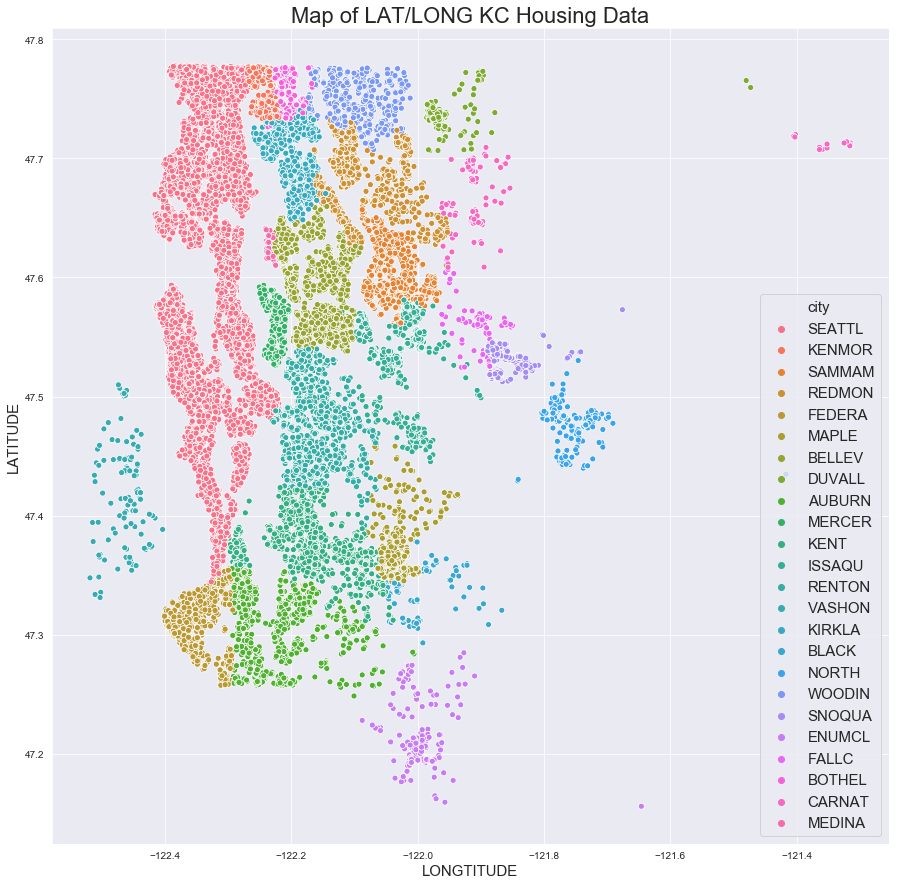

In [84]:
plt.figure(figsize=(15,15))

sns.scatterplot(x='long', y='lat', data=df_eda, hue='city');

plt.title('Map of LAT/LONG KC Housing Data', fontsize=22)
plt.ylabel('LATITUDE', fontsize=15)
plt.xlabel('LONGTITUDE', fontsize=15)
plt.legend(frameon=None, fontsize=15)

## Barplot - City & Population

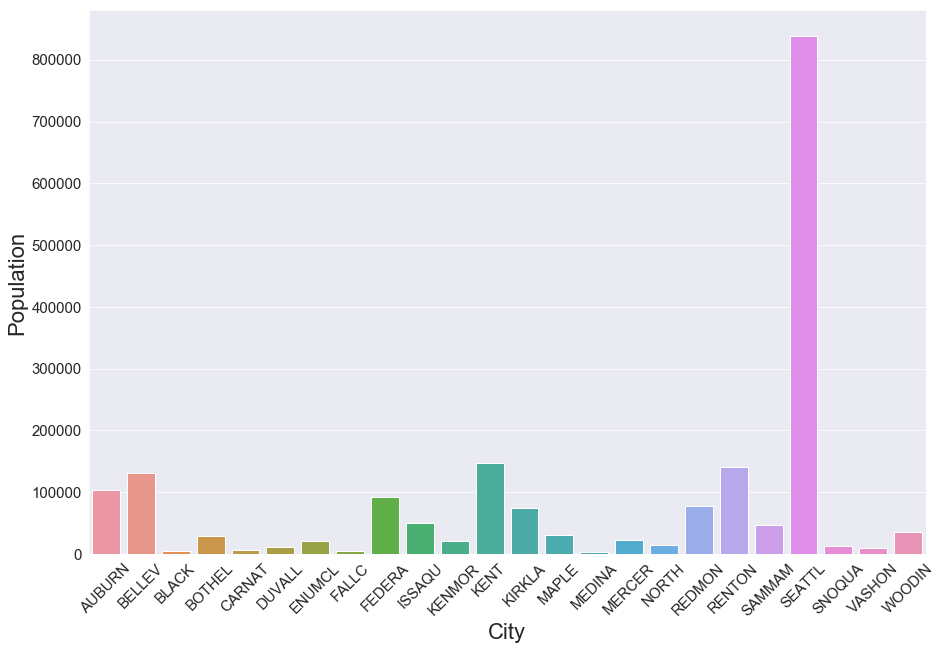

In [85]:
df_city_pop = df_eda.groupby('city').mean()
plt.figure(figsize=(15,10))

sns.barplot(x=df_city_pop.index, y="city_population", data=df_city_pop);

plt.ylabel('Population', fontsize=22);
plt.yticks(fontsize=15);
plt.xlabel('City', fontsize=22);
plt.xticks(rotation=45, fontsize=15);

## Transaction Frequency

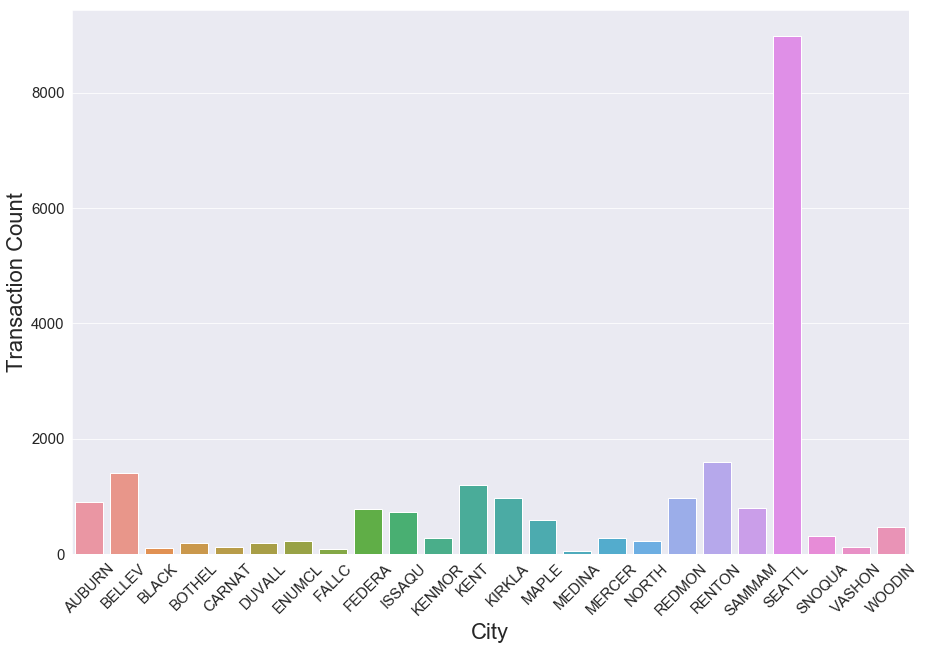

In [86]:
df_city_count = df_eda.groupby('city').sum()

plt.figure(figsize=(15,10))

sns.barplot(x=df_city_count.index, y="count", data=df_city_count);

plt.ylabel('Transaction Count', fontsize=22);
plt.yticks(fontsize=15);
plt.xlabel('City', fontsize=22);
plt.xticks(rotation=45, fontsize=15);

## Bar/Boxenplot - City & Price

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


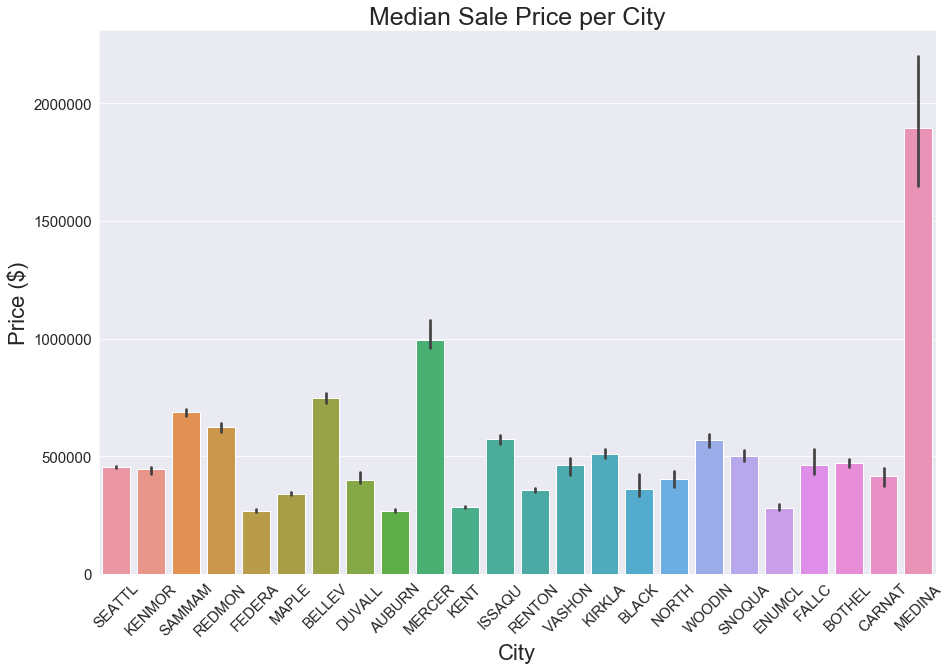

In [87]:
plt.figure(figsize=(15,10))

sns.barplot(x="city", y="price", data=df_eda, estimator=np.median);

plt.title('Median Sale Price per City', fontsize=25)
plt.ylabel('Price ($)', fontsize=22);
plt.yticks(fontsize=15)
plt.xlabel('City', fontsize=22);
plt.xticks(rotation=45, fontsize=15);

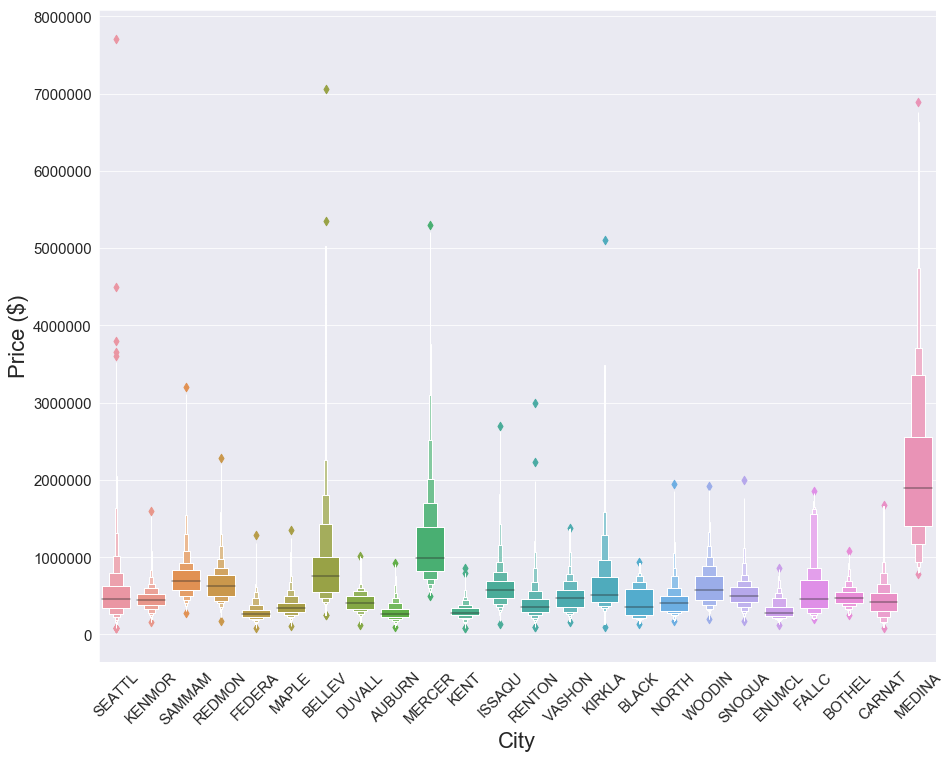

In [88]:
plt.figure(figsize=(15,12))

sns.boxenplot(x="city", y="price", data=df_eda);

plt.ylabel('Price ($)', fontsize=22);
plt.yticks(fontsize=15);
plt.xlabel('City', fontsize=22);
plt.xticks(rotation=45, fontsize=15);

**Filter out cities with more than 100,000 people, or have less than 1000 (5%) of transactions that year.  Added in an average housing price ceiling of 500,000 to reduce high-end housing.**

* Filter out big cities like Seattle
* Filter out small yet expensive cities like Medina.

## Grade & Condition Visuals

In [89]:
# df_qual_city_df = df_eda[((df_eda['city_population'] < 100000) |
#                               (df_eda['transactions'] < 1000)) &
#                              (df_eda['price'] < 500000)]
# df_qual_city_df.groupby('city').mean().head()

In [90]:
df_eda['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64


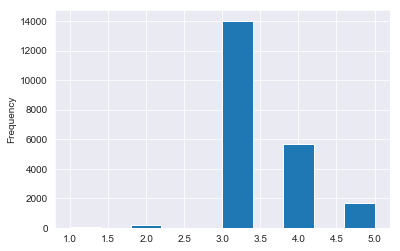

In [91]:
print(df_eda['condition'].value_counts())
df_eda['condition'].plot.hist()

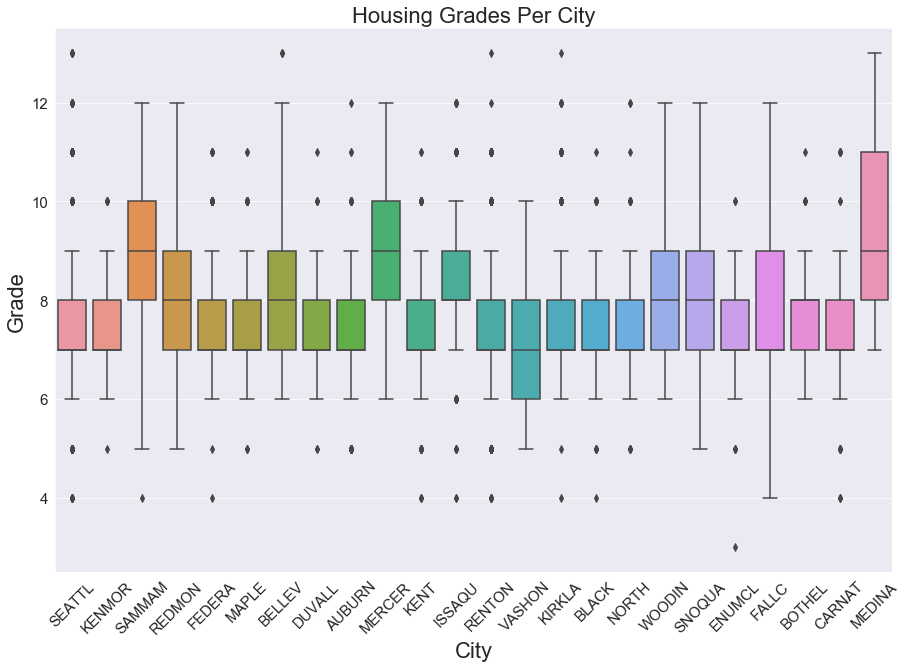

In [92]:
plt.figure(figsize=(15,10))

sns.boxplot(x='city', y="grade", data=df_eda);

plt.title('Housing Grades Per City', fontsize=22)
plt.ylabel('Grade', fontsize=22);
plt.yticks(fontsize=15);
plt.xlabel('City', fontsize=22);
plt.xticks(rotation=45, fontsize=15);

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


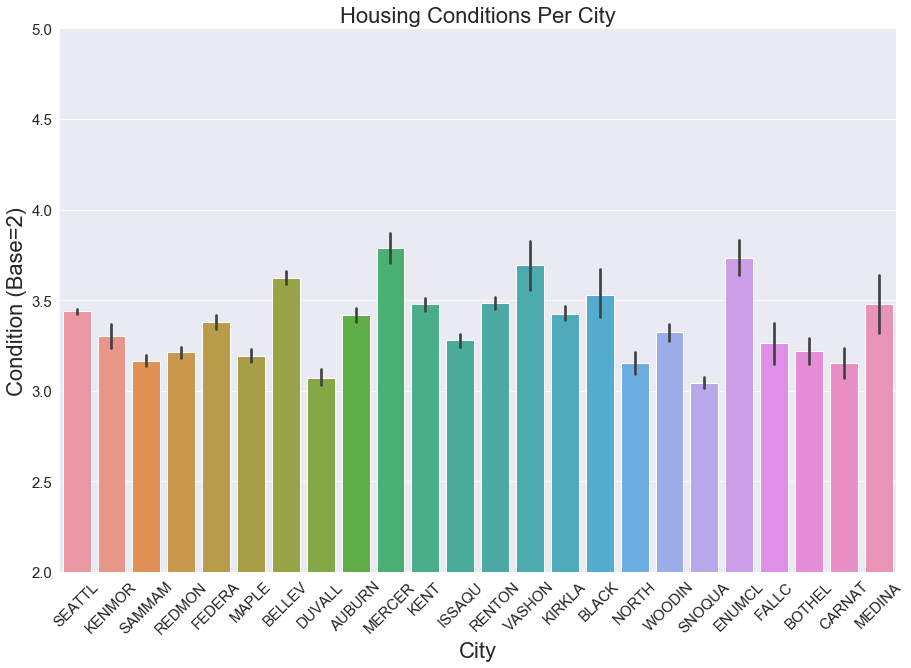

In [93]:
plt.figure(figsize=(15,10))

sns.barplot(x='city', y="condition", data=df_eda);

plt.title('Housing Conditions Per City', fontsize=22)
plt.ylim(bottom=2, top=5)
plt.ylabel('Condition (Base=2)', fontsize=22);
plt.yticks(fontsize=15);
plt.xlabel('City', fontsize=22);
plt.xticks(rotation=45, fontsize=15);

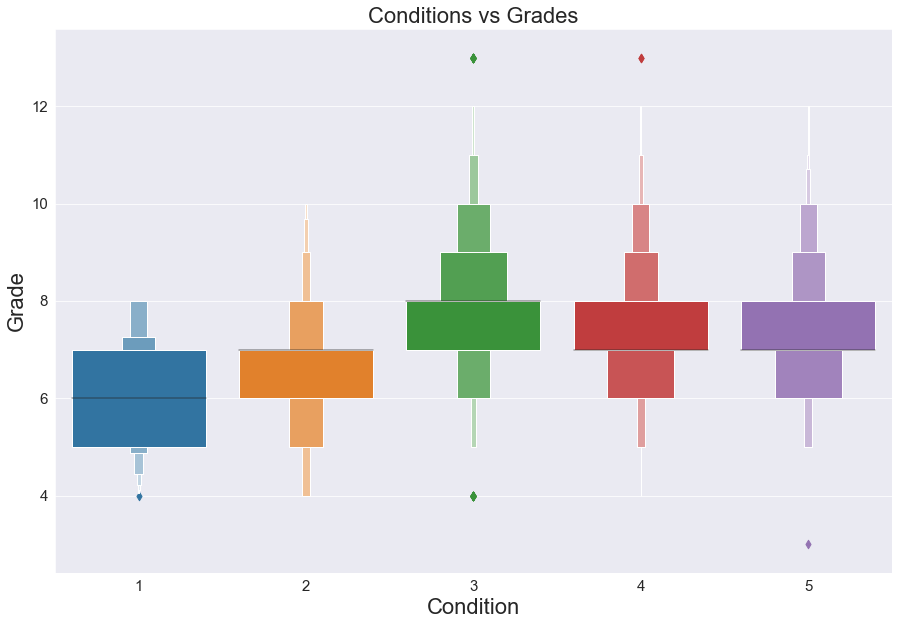

In [94]:
plt.figure(figsize=(15,10))

sns.boxenplot(x="condition", y="grade", data=df_eda);

plt.title('Conditions vs Grades', fontsize=22)
plt.ylabel('Grade', fontsize=22);
plt.yticks(fontsize=15);
plt.xlabel('Condition', fontsize=22);
plt.xticks(fontsize=15);

## Renovation Visualizations

In [95]:
df_new_build_reno = df_eda[(df_eda['built_yrs_ago'] <= 5) | (df_eda['renovated'] == 1)]
df_new_build_reno

id       date      price  bedrooms  bathrooms  sqft_living  \
1      6414100192 2014-12-09   538000.0         3       2.25         2570   
35     9547205180 2014-06-13   696000.0         3       2.50         2300   
42     7203220400 2014-07-07   861990.0         5       2.75         3595   
63     9528102996 2014-12-07   549000.0         3       1.75         1540   
95     1483300570 2014-09-08   905000.0         4       2.50         3300   
103    2450000295 2014-10-07  1090000.0         3       2.50         2920   
116    3362400431 2014-06-26   518500.0         3       3.50         1590   
125    4389200955 2015-03-02  1450000.0         4       2.75         2750   
133    8929000270 2014-05-12   453246.0         3       2.50         2010   
139    2767603505 2014-05-07   519950.0         3       2.25         1170   
158    8029200135 2014-11-13   247000.0         3       2.00         1270   
206    9526600140 2014-09-19   677900.0         3       2.50         2440   
209    6300000550 2014-07-17   464000.0         6       3.00         2300   
211    1025049114 2014-07-17   625504.0         3       2.25         1270   
216      46100204 2015-02-21  1510000.0         5       3.00         3300   
230    8096000060 2015-04-13   655000.0         2       1.75         1450   
237    7228500560 2015-03-20   410000.0         4       1.00         1970   
274    4235400186 2014-11-24   331000.0         3       1.75         1080   
277    1126049053 2014-11-13   770000.0         4       2.75         3820   
282    7424700045 2015-05-13  2050000.0         5       3.00         3830   
320     325059286 2014-05-13   819900.0         5       2.75         3150   
324    7520000520 2014-09-05   232000.0         2       1.00         1240   
325    7520000520 2015-03-11   240500.0         2       1.00         1240   
330    3179100060 2014-09-16   880000.0         4       3.50         2800   
341    1115300070 2014-11-06   684000.0         4       3.50         3040   
358     325059171 2014-05-05   900000.0         3       1.00         1330   
363     925059078 2014-08-19   604950.0         3       2.50         2110   
379    7132300695 2015-04-21   435000.0         3       1.50         1300   
398    1604601375 2014-06-19   378750.0         3       2.50         2160   
418    8724300030 2014-12-23   355000.0         3       2.25         1860   
435    2268400350 2014-09-16   749000.0         4       2.50         1710   
470    2172000075 2014-06-23   290900.0         2       2.00         1610   
474    1853080570 2014-08-11   859900.0         4       2.75         3390   
496    4432600075 2015-01-28   725000.0         4       2.00         2110   
521    1180003090 2014-09-06   190000.0         2       1.00          630   
556    5486800070 2014-06-20  1950000.0         7       3.50         4640   
562    6431500140 2014-12-17   880000.0         3       2.50         2870   
576    8669160310 2014-12-09   266000.0         3       2.50         1805   
577    1526069135 2014-12-11   930000.0         4       4.00         6050   
586    7942601895 2014-08-19   640000.0         3       2.50         2160   
626    7548300731 2014-08-08   559950.0         3       2.50         1660   
631     582000135 2014-06-22   565000.0         2       1.75         1330   
643    9385200045 2015-05-12   729500.0         3       2.50         1660   
685    2346200030 2015-01-05   802541.0         5       2.75         2990   
717    8820903380 2014-07-28   452000.0         6       2.25         2660   
718    8820903380 2015-01-02   730000.0         6       2.25         2660   
732    2619950350 2014-05-08   403000.0         3       2.75         2090   
734     731500200 2015-01-13   347500.0         4       2.50         2156   
753    8682300890 2014-08-28   699800.0         2       2.50         2380   
754    4385700765 2014-06-03   850000.0         3       1.75         1370   
773    1623300160 2014-05-06   450000.0         2       2.00         1100   
782    1139

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


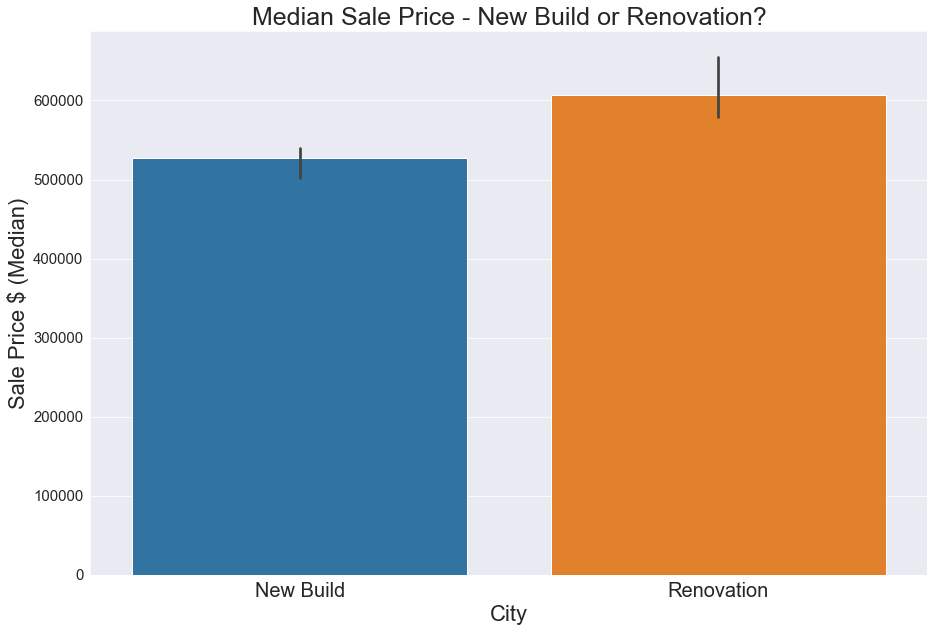

In [96]:
plt.figure(figsize=(15,10))

sns.barplot(x='renovated', y="price", data=df_new_build_reno, estimator=np.median);

plt.title('Median Sale Price - New Build or Renovation?', fontsize=25)
plt.ylabel('Sale Price $ (Median)', fontsize=22);
plt.yticks(fontsize=15);
plt.xlabel('City', fontsize=22);
plt.xticks([0,1],['New Build', 'Renovation'], fontsize=20);

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


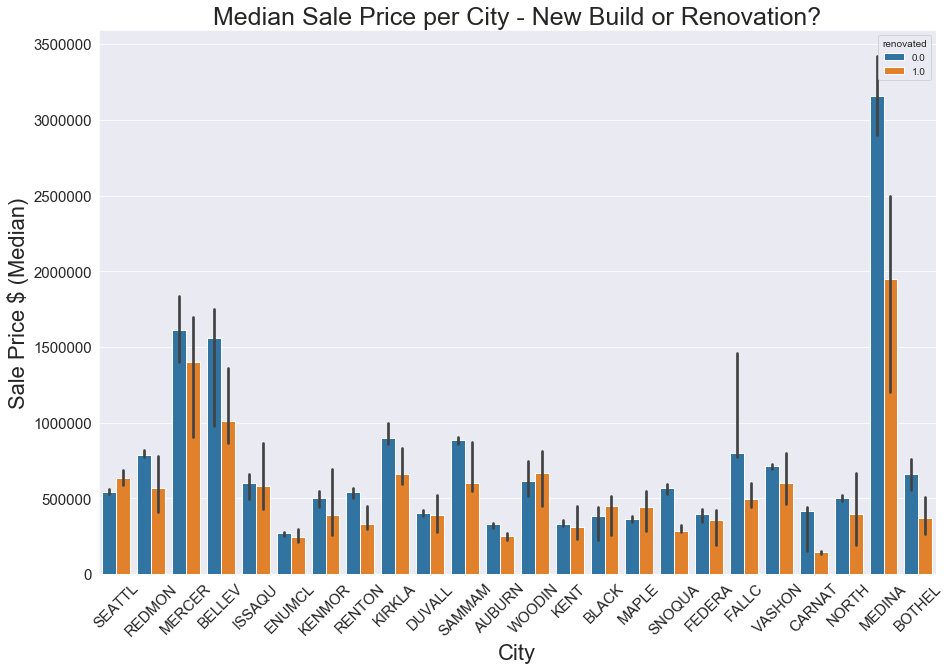

In [97]:
plt.figure(figsize=(15,10))

sns.barplot(x='city', y="price", hue='renovated', data=df_new_build_reno, estimator=np.median);
# plt.legend(['Not Renovated', 'Renovated']);

plt.title('Median Sale Price per City - New Build or Renovation?', fontsize=25)
plt.ylabel('Sale Price $ (Median)', fontsize=22);
plt.yticks(fontsize=15);
plt.xlabel('City', fontsize=22);
plt.xticks(rotation=45, fontsize=15);

plt.show();

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


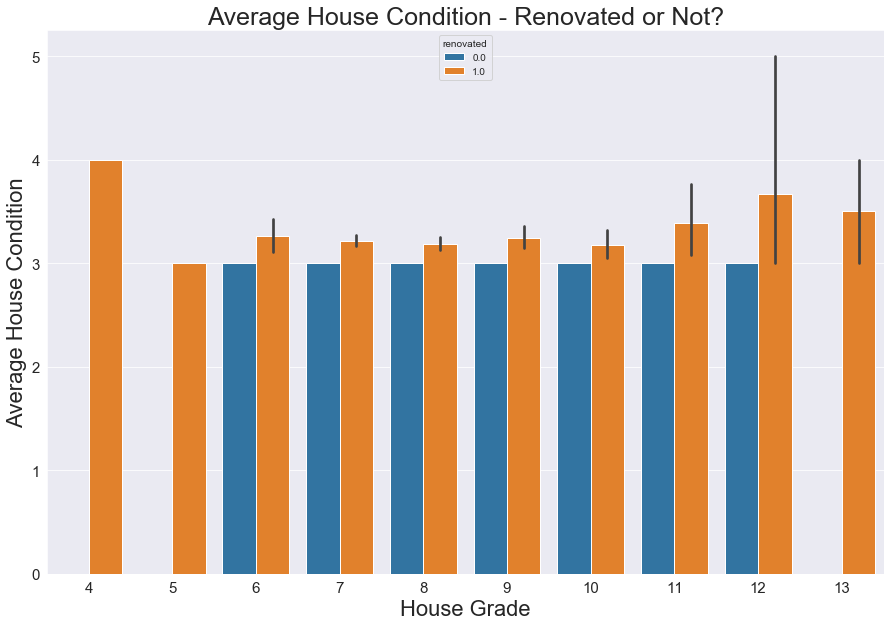

In [98]:
plt.figure(figsize=(15,10))

sns.barplot(x='grade', y="condition", hue='renovated', data=df_new_build_reno);

plt.title('Average House Condition - Renovated or Not?', fontsize=25)
plt.ylabel('Average House Condition', fontsize=22);
plt.yticks(fontsize=15);
plt.xlabel('House Grade', fontsize=22);
plt.xticks(fontsize=15);
plt.show();

# Create Dummies

## Default Dummies

In [99]:
wtr_dummies = pd.get_dummies(df_eda['waterfront'], prefix='Wtr', drop_first=True, dtype=int)
bed_dummies = pd.get_dummies(df_eda['bedrooms'], prefix = 'bed', drop_first=True, dtype=int)
bath_dummies = pd.get_dummies(df_eda['bathrooms'], prefix='bath', drop_first=True, dtype=int)
cond_dummies = pd.get_dummies(df_eda['condition'], prefix = 'cond', drop_first=True, dtype=int)
flr_dummies = pd.get_dummies(df_eda['floors'], prefix='flr', drop_first=True, dtype=int)
grade_dummies = pd.get_dummies(df_eda['grade'], prefix='grade', drop_first=True, dtype=int)
view_dummies = pd.get_dummies(df_eda['view'], prefix='view', drop_first=True, dtype=int)
zip_dummies = pd.get_dummies(df_eda['zipcode'], prefix='zip', drop_first=True, dtype=int)

# Initial Pricing Model

In [100]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

In [101]:
df_eda.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
bathroom_bins       0
bedroom_bins        0
grade_bins          0
cond_bins           0
floor_bins          0
view_binar          0
basement_binar      0
built_yrs_ago       0
count               0
city                0
city_population     0
zip_population      0
transactions        0
sale_capita_city    0
resale              0
flipped             0
renovated           0
dtype: int64

In [102]:
df_model_base = df_eda.copy()


df_model_base = df_model_base.drop(['id',
                                    'date',
                                    'lat',
                                    'long',
                                    'sqft_above',
                                    'bathroom_bins',
                                    'bedroom_bins',
                                    'grade_bins',
                                    'cond_bins',
                                    'floor_bins',
                                    'view_binar',
                                    'basement_binar',
                                    'count',
                                    'city',
                                     ], axis=1)

print(len(df_model_base.columns))
df_model_base.head()

24


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         0.0   
1  538000.0         3       2.25         2570      7242     2.0         0.0   
2  180000.0         2       1.00          770     10000     1.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   
4  510000.0         3       2.00         1680      8080     1.0         0.0   

   view  condition  grade  sqft_basement  yr_built  yr_renovated  zipcode  \
0   0.0          3      7            0.0      1955           0.0    98178   
1   0.0          3      7          400.0      1951        1991.0    98125   
2   0.0          3      6            0.0      1933        1800.0    98028   
3   0.0          5      7          910.0      1965           0.0    98136   
4   0.0          3      8            0.0      1987           0.0    98074   

   sqft_living15  sqft_lot15  built_yrs_ago  city_population  zip_population  \
0           1340        5650             59           837792           24092   
1           1690        7639             63           837792           37081   
2           2720        8062             82            20419           20419   
3           1360        5000             49           837792           14770   
4           1800        7503             28            46463           25748   

   transactions  sale_capita_city  resale  flipped  renovated  
0          8973          0.010710     0.0      0.0        0.0  
1          8973          0.010710     0.0      0.0        1.0  
2           283          0.013860     0.0      0.0        0.0  
3          8973          0.010710     0.0      0.0        0.0  
4           800          0.017218     0.0      0.0        0.0

In [103]:
outcome = 'price'
predictors = df_model_base.drop('price', axis=1).columns
pred_sum = '+'.join(predictors)
formula1 = outcome + '~' + pred_sum
formula1

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_basement+yr_built+yr_renovated+zipcode+sqft_living15+sqft_lot15+built_yrs_ago+city_population+zip_population+transactions+sale_capita_city+resale+flipped+renovated'

## Initiate Base Model

In [104]:
model_base = ols(formula=formula1, data=df_model_base).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2010.
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:56:59   Log-Likelihood:            -2.9503e+05
No. Observations:               21597   AIC:                         5.901e+05
Df Residuals:                   21573   BIC:                         5.903e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.624e+08    8.4e+06     19.341      0.000    1.46e+08    1.79e+08
bedrooms         -3.521e+04   1963.193    -17.934      0.000   -3.91e+04   -3.14e+04
bathrooms         3.498e+04   3363.760     10.399      0.000    2.84e+04    4.16e+04
sqft_living        185.3887      3.777     49.088      0.000     177.986     192.791
sqft_lot             0.0316      0.049      0.641      0.522      -0.065       0.128
floors           -1.082e+04   3819.995     -2.833      0.005   -1.83e+04   -3333.647
waterfront        2.359e+05   1.23e+04     19.130      0.000    2.12e+05     2.6e+05
view               4.93e+04   2282.452     21.598      0.000    4.48e+04    5.38e+04
condition         3.182e+04   2430.667     13.090      0.000    2.71e+04    3.66e+04
grade             1.016e+05   2222.182     45.709      0.000    9.72e+04    1.06e+05
sqft_basement      -34.1732      4.493     -7.607      0.000     -42.979     -25.367
yr_built          2.588e+04   3040.086      8.511      0.000    1.99e+04    3.18e+04
yr_renovated         1.4944      2.063      0.725      0.469      -2.548       5.537
zipcode          -2196.0301     59.185    -37.104      0.000   -2312.038   -2080.022
sqft_living15       38.0545      3.591     10.598      0.000      31.016      45.093
sqft_lot15          -0.4149      0.076     -5.477      0.000      -0.563      -0.266
built_yrs_ago     2.816e+04   3039.352      9.264      0.000    2.22e+04    3.41e+04
city_population     -4.5591      0.166    -27.537      0.000      -4.884      -4.235
zip_population      -2.1983      0.143    -15.381      0.000      -2.478      -1.918
transactions       461.6062     15.458     29.862      0.000     431.307     491.905
sale_capita_city -8.051e+06   8.62e+05     -9.343      0.000   -9.74e+06   -6.36e+06
resale            5.453e+04   1.64e+04      3.329      0.001    2.24e+04    8.66e+04
flipped          -1.136e+04   2.12e+04     -0.537      0.591   -5.28e+04    3.01e+04
renovated         5.597e+04   9048.036      6.186      0.000    3.82e+04    7.37e+04
==============================================================================
Omnibus:                    18574.431   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1878768.011
Skew:                           3.636   Prob(JB):                         0.00
Kurtosis:                      48.110   Cond. No.                     3.28e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residuals Observations

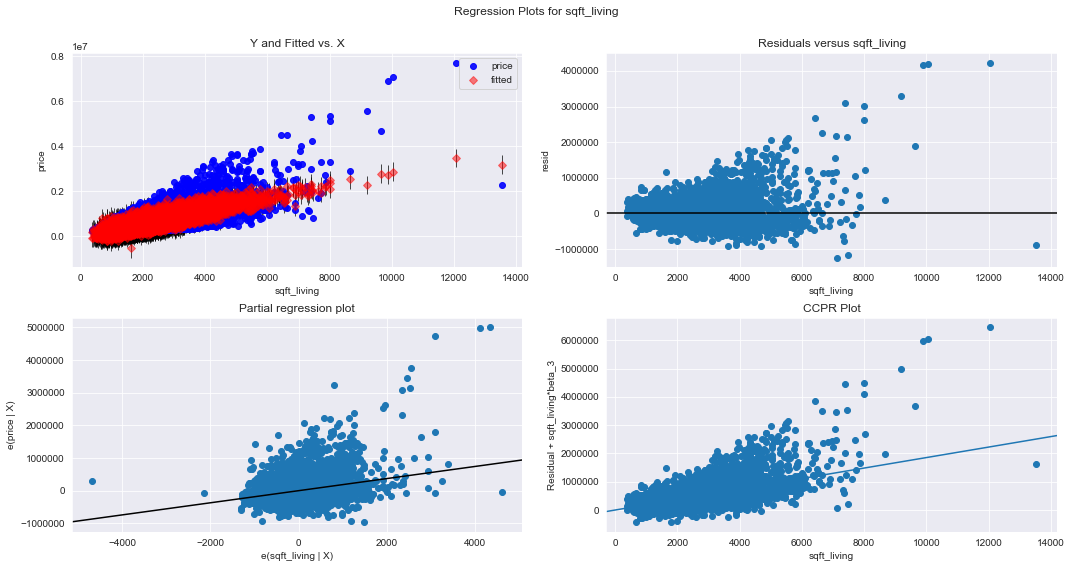

In [105]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_base, 'sqft_living', fig=fig)
plt.show()

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


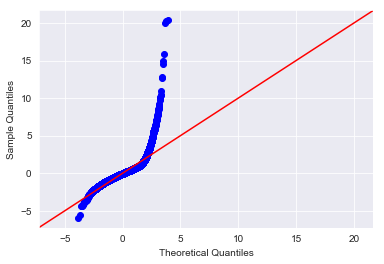

In [106]:
import scipy.stats as stats
residuals = model_base.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [107]:
data = df_model_base
y = data[['price']]
X = data.drop(['price'], axis=1)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [110]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [111]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [112]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    4.306959e+10
dtype: float64
Test Mean Squarred Error: price    4.258200e+10
dtype: float64


In [113]:
print('Price Prediction Error:', round(np.sqrt(mse_train), 2))
print('Price Prediction Error:', round(np.sqrt(mse_test), 2))

Price Prediction Error: price    207532.15
dtype: float64
Price Prediction Error: price    206354.08
dtype: float64


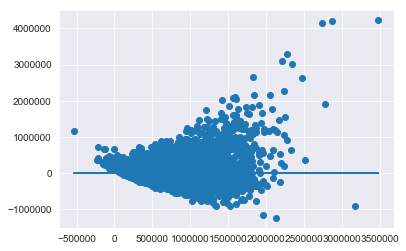

In [114]:
plt.scatter(model_base.predict(df_model_base[predictors]), model_base.resid)
plt.plot(model_base.predict(df_model_base[predictors]), [0 for i in range(len(df_model_base))]);

# Clean Outliers

In [115]:
df_eda.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.018035      0.234639      3.409825   
std    4.141264e+04      0.539683      0.131109      0.764703      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     285.737602   1970.999676    388.969348   
std        1.173200    827.759761     439.806196     29.375234    749.902523   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000   
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512   
std       53.513072      0.138552      0.140724     685.230472   27274.441950   
min    98001.000000     47.155900   -122.519000     399.000000     651.000000   
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000   
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000   
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000   
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000   

         view_binar  basement_binar  built_yrs_ago    count  city_population  \
count  21597.000000     21597.00000   21597.000000  21597.0     21597.000000   
mean       0.100708         0.38510      43.323286      1.0    396544.020373   
std        0.300949         0.48663      29.377285      0.0    373798.787905   
min        0.000000         0.00000      -1.000000      1.0      2971.000000   
25%        0.000000         0.00000      18.000000      1.0     74745.000000   
50%        0.000000         0.00000      40.000000      1.0    141407.000000   
75%        0.000000         1.00000      63.000000      1.0    837792.000000   
max        1.000000         1.00000     115.000000      1.0    837792.000000   

       zip_population  transactions  sale_capita_city        resale  \
count    21597.000000  21597.000000      21597.000000  21597.000000   
mean     30693.461036   4262.551049          0.011744      0.008196   
std      11126.882769   3985.710886          0.002930      0.090160   
min       2971.000000     50.000000          0.006675      0.000000   
25%      21904.000000    800.000000          0.010710      0.00000

In [117]:
def feature_cleaner(features, df):
    for feature in features:
        upper_limit = np.mean(df[feature]) + np.std(df[feature]) * 2.5
        print(upper_limit)
        df = df[df[feature] < upper_limit]
    return df

cleaned_df = feature_cleaner(['bathrooms', 'bedrooms'], df_eda)
cleaned_df = cleaned_df.reset_index().drop('index', axis=1)
cleaned_df.describe()

4.038242505696349
5.623566006487396


id         price      bedrooms     bathrooms   sqft_living  \
count  2.106100e+04  2.106100e+04  21061.000000  21061.000000  21061.000000   
mean   4.589620e+09  5.238745e+05      3.315512      2.074830   2032.050805   
std    2.878321e+09  3.206890e+05      0.822708      0.709209    841.691338   
min    1.200019e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.125049e+09  3.200000e+05      3.000000      1.500000   1410.000000   
50%    3.905000e+09  4.475000e+05      3.000000      2.250000   1890.000000   
75%    7.334501e+09  6.300000e+05      4.000000      2.500000   2500.000000   
max    9.900000e+09  4.490000e+06      5.000000      4.000000   7850.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.106100e+04  21061.000000  21061.000000  21061.000000  21061.000000   
mean   1.482777e+04      1.487323      0.016927      0.221191      3.410569   
std    4.082190e+04      0.538768      0.127007      0.740221      0.650838   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.015000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.568000e+03      1.000000      0.000000      0.000000      3.000000   
75%    1.051100e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21061.000000  21061.000000   21061.000000  21061.000000  21061.000000   
mean       7.624139   1753.754950     272.727031   1970.949433    387.356963   
std        1.134972    776.970685     420.715689     29.312685    748.495777   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1180.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1540.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2170.000000     520.000000   1996.000000      0.000000   
max       13.000000   7850.000000    3500.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  21061.000000  21061.000000  21061.000000   21061.000000   21061.000000   
mean   98078.098713     47.559376   -122.213975    1969.185699   12582.410284   
std       53.513447      0.139156      0.141131     665.956379   26400.891993   
min    98001.000000     47.155900   -122.519000     399.000000     651.000000   
25%    98033.000000     47.468600   -122.329000    1480.000000    5100.000000   
50%    98065.000000     47.570800   -122.231000    1830.000000    7600.000000   
75%    98118.000000     47.678300   -122.125000    2340.000000   10018.000000   
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000   

         view_binar  basement_binar  built_yrs_ago    count  city_population  \
count  21061.000000    21061.000000   21061.000000  21061.0     21061.000000   
mean       0.096007        0.378472      43.373961      1.0    396795.614596   
std        0.294608        0.485018      29.315231      0.0    373827.598858   
min        0.000000        0.000000      -1.000000      1.0      2971.000000   
25%        0.000000        0.000000      18.000000      1.0     74745.000000   
50%        0.000000        0.000000      40.000000      1.0    141407.000000   
75%        0.000000        1.000000      63.000000      1.0    837792.000000   
max        1.000000        1.000000     115.000000      1.0    837792.000000   

       zip_population  transactions  sale_capita_city        resale  \
count    21061.000000  21061.000000      21061.000000  21061.000000   
mean     30732.285219   4264.908266          0.011743      0.008072   
std      11126.968678   3986.254147          0.002939      0.089482   
min       2971.000000     50.000000          0.006675      0.000000   
25%      21904.000000    800.000000          0.010710      0.00000

In [118]:
#Finding a cutoff point
def upper_quantile_info(features, df):
    for feature in features:
        print(feature)
        for i in range(90, 100):
            q = i / 100
            print('{} percentile: {}'.format(q, df[feature].quantile(q=q)))
        print('-----------------------------')
        
dirty_features = ['price',
                  'sqft_basement',
                  'sqft_lot',
                  'sqft_lot15']
upper_quantile_info(dirty_features, cleaned_df)

price
0.9 percentile: 858000.0
0.91 percentile: 887120.0000000005
0.92 percentile: 920000.0
0.93 percentile: 954899.9999999995
0.94 percentile: 1000000.0
0.95 percentile: 1080000.0
0.96 percentile: 1190000.0
0.97 percentile: 1300000.0
0.98 percentile: 1460000.0
0.99 percentile: 1780000.0
-----------------------------
sqft_basement
0.9 percentile: 930.0
0.91 percentile: 960.0
0.92 percentile: 1000.0
0.93 percentile: 1030.0
0.94 percentile: 1080.0
0.95 percentile: 1130.0
0.96 percentile: 1200.0
0.97 percentile: 1280.0
0.98 percentile: 1390.0
0.99 percentile: 1580.0
-----------------------------
sqft_lot
0.9 percentile: 20785.0
0.91 percentile: 23259.000000000033
0.92 percentile: 27604.600000000024
0.93 percentile: 33875.599999999955
0.94 percentile: 37016.99999999997
0.95 percentile: 42580.0
0.96 percentile: 49658.0
0.97 percentile: 65340.0
0.98 percentile: 103237.0
0.99 percentile: 210222.20000000007
-----------------------------
sqft_lot15
0.9 percentile: 17376.0
0.91 percentile: 19512

In [172]:
cleaned_df = cleaned_df[cleaned_df['sqft_lot'] <= 103237.0]
cleaned_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.058500e+04  2.058500e+04  20585.000000  20585.000000  20585.000000   
mean   4.643109e+09  5.191335e+05      3.315667      2.067938   2015.314112   
std    2.876218e+09  3.091853e+05      0.823196      0.706544    824.704196   
min    1.200019e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.190601e+09  3.182000e+05      3.000000      1.500000   1410.000000   
50%    4.017050e+09  4.450000e+05      3.000000      2.250000   1880.000000   
75%    7.394400e+09  6.270000e+05      4.000000      2.500000   2480.000000   
max    9.900000e+09  3.000000e+06      5.000000      4.000000   7850.000000   

            sqft_lot        floors    waterfront          view     condition  \
count   20585.000000  20585.000000  20585.000000  20585.000000  20585.000000   
mean    10198.354530      1.486252      0.016104      0.214307      3.412776   
std     11266.870873      0.539789      0.123885      0.727488      0.651377   
min       520.000000      1.000000      0.000000      0.000000      1.000000   
25%      5000.000000      1.000000      0.000000      0.000000      3.000000   
50%      7500.000000      1.000000      0.000000      0.000000      3.000000   
75%     10200.000000      2.000000      0.000000      0.000000      4.000000   
max    103237.000000      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  20585.000000  20585.000000    20585.00000  20585.000000  20585.000000   
mean       7.609813   1737.168667      272.54496   1970.720670    388.521642   
std        1.121115    760.683108      417.24076     29.402054    749.247751   
min        3.000000    370.000000        0.00000   1900.000000      0.000000   
25%        7.000000   1180.000000        0.00000   1951.000000      0.000000   
50%        7.000000   1540.000000        0.00000   1974.000000      0.000000   
75%        8.000000   2150.000000      520.00000   1996.000000      0.000000   
max       13.000000   7850.000000     2600.00000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  20585.000000  20585.000000  20585.000000   20585.000000   20585.000000   
mean   98078.894389     47.560955   -122.217856    1959.098421    9649.145543   
std       53.714617      0.138158      0.138001     661.350331   10482.904632   
min    98001.000000     47.155900   -122.512000     460.000000     651.000000   
25%    98033.000000     47.473100   -122.330000    1480.000000    5040.000000   
50%    98070.000000     47.572200   -122.237000    1820.000000    7515.000000   
75%    98118.000000     47.678900   -122.131000    2330.000000    9803.000000   
max    98199.000000     47.777600   -121.315000    6210.000000  145490.000000   

         view_binar  basement_binar  built_yrs_ago    count  city_population  \
count  20585.000000    20585.000000   20585.000000  20585.0     20585.000000   
mean       0.093709        0.380908      43.602380      1.0    404712.665242   
std        0.291431        0.485622      29.404635      0.0    374177.573977   
min        0.000000        0.000000      -1.000000      1.0      2971.000000   
25%        0.000000        0.000000      18.000000      1.0     74745.000000   
50%        0.000000        0.000000      40.000000      1.0    141407.000000   
75%        0.000000        1.000000      63.000000      1.0    837792.000000   
max        1.000000        1.000000     115.000000      1.0    837792.000000   

       zip_population  transactions  sale_capita_city        resale  \
count    20585.000000  20585.000000      20585.000000  20585.000000   
mean     30958.404324   4348.933544          0.011693      0.008161   
std      11013.408999   3990.479702          0.002901      0.089973   
min       2971.000000     50.000000          0.006675      0.000000   
25%      22241.000000    911.000000          0.010710    

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


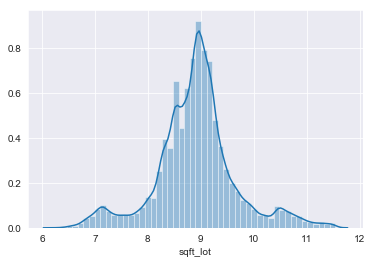

In [173]:
sns.distplot(np.log(cleaned_df['sqft_lot']));

In [174]:
upper_quantile_info(dirty_features, cleaned_df)

price
0.9 percentile: 852300.0000000012
0.91 percentile: 880000.0
0.92 percentile: 914250.8800000008
0.93 percentile: 950000.0
0.94 percentile: 996959.9999999991
0.95 percentile: 1070000.0
0.96 percentile: 1180000.0
0.97 percentile: 1284799.9999999956
0.98 percentile: 1440000.0
0.99 percentile: 1740000.0
-----------------------------
sqft_basement
0.9 percentile: 920.0
0.91 percentile: 960.0
0.92 percentile: 1000.0
0.93 percentile: 1030.0
0.94 percentile: 1070.0
0.95 percentile: 1120.0
0.96 percentile: 1200.0
0.97 percentile: 1270.0
0.98 percentile: 1380.0
0.99 percentile: 1550.0
-----------------------------
sqft_lot
0.9 percentile: 17490.600000000013
0.91 percentile: 18926.040000000037
0.92 percentile: 20705.60000000005
0.93 percentile: 23067.400000000052
0.94 percentile: 27423.919999999933
0.95 percentile: 33562.99999999994
0.96 percentile: 36741.119999999966
0.97 percentile: 41807.36
0.98 percentile: 49222.0
0.99 percentile: 63997.72
-----------------------------
sqft_lot15
0.9 per

In [175]:
cleaned_df = cleaned_df[cleaned_df['sqft_lot15'] <= 148664.11999999976]
cleaned_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.058500e+04  2.058500e+04  20585.000000  20585.000000  20585.000000   
mean   4.643109e+09  5.191335e+05      3.315667      2.067938   2015.314112   
std    2.876218e+09  3.091853e+05      0.823196      0.706544    824.704196   
min    1.200019e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.190601e+09  3.182000e+05      3.000000      1.500000   1410.000000   
50%    4.017050e+09  4.450000e+05      3.000000      2.250000   1880.000000   
75%    7.394400e+09  6.270000e+05      4.000000      2.500000   2480.000000   
max    9.900000e+09  3.000000e+06      5.000000      4.000000   7850.000000   

            sqft_lot        floors    waterfront          view     condition  \
count   20585.000000  20585.000000  20585.000000  20585.000000  20585.000000   
mean    10198.354530      1.486252      0.016104      0.214307      3.412776   
std     11266.870873      0.539789      0.123885      0.727488      0.651377   
min       520.000000      1.000000      0.000000      0.000000      1.000000   
25%      5000.000000      1.000000      0.000000      0.000000      3.000000   
50%      7500.000000      1.000000      0.000000      0.000000      3.000000   
75%     10200.000000      2.000000      0.000000      0.000000      4.000000   
max    103237.000000      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  20585.000000  20585.000000    20585.00000  20585.000000  20585.000000   
mean       7.609813   1737.168667      272.54496   1970.720670    388.521642   
std        1.121115    760.683108      417.24076     29.402054    749.247751   
min        3.000000    370.000000        0.00000   1900.000000      0.000000   
25%        7.000000   1180.000000        0.00000   1951.000000      0.000000   
50%        7.000000   1540.000000        0.00000   1974.000000      0.000000   
75%        8.000000   2150.000000      520.00000   1996.000000      0.000000   
max       13.000000   7850.000000     2600.00000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  20585.000000  20585.000000  20585.000000   20585.000000   20585.000000   
mean   98078.894389     47.560955   -122.217856    1959.098421    9649.145543   
std       53.714617      0.138158      0.138001     661.350331   10482.904632   
min    98001.000000     47.155900   -122.512000     460.000000     651.000000   
25%    98033.000000     47.473100   -122.330000    1480.000000    5040.000000   
50%    98070.000000     47.572200   -122.237000    1820.000000    7515.000000   
75%    98118.000000     47.678900   -122.131000    2330.000000    9803.000000   
max    98199.000000     47.777600   -121.315000    6210.000000  145490.000000   

         view_binar  basement_binar  built_yrs_ago    count  city_population  \
count  20585.000000    20585.000000   20585.000000  20585.0     20585.000000   
mean       0.093709        0.380908      43.602380      1.0    404712.665242   
std        0.291431        0.485622      29.404635      0.0    374177.573977   
min        0.000000        0.000000      -1.000000      1.0      2971.000000   
25%        0.000000        0.000000      18.000000      1.0     74745.000000   
50%        0.000000        0.000000      40.000000      1.0    141407.000000   
75%        0.000000        1.000000      63.000000      1.0    837792.000000   
max        1.000000        1.000000     115.000000      1.0    837792.000000   

       zip_population  transactions  sale_capita_city        resale  \
count    20585.000000  20585.000000      20585.000000  20585.000000   
mean     30958.404324   4348.933544          0.011693      0.008161   
std      11013.408999   3990.479702          0.002901      0.089973   
min       2971.000000     50.000000          0.006675      0.000000   
25%      22241.000000    911.000000          0.010710    

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


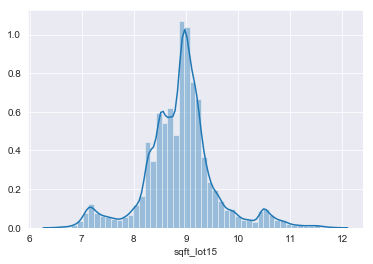

In [176]:
sns.distplot(np.log(cleaned_df['sqft_lot15']));

In [177]:
upper_quantile_info(dirty_features, cleaned_df)

price
0.9 percentile: 852300.0000000012
0.91 percentile: 880000.0
0.92 percentile: 914250.8800000008
0.93 percentile: 950000.0
0.94 percentile: 996959.9999999991
0.95 percentile: 1070000.0
0.96 percentile: 1180000.0
0.97 percentile: 1284799.9999999956
0.98 percentile: 1440000.0
0.99 percentile: 1740000.0
-----------------------------
sqft_basement
0.9 percentile: 920.0
0.91 percentile: 960.0
0.92 percentile: 1000.0
0.93 percentile: 1030.0
0.94 percentile: 1070.0
0.95 percentile: 1120.0
0.96 percentile: 1200.0
0.97 percentile: 1270.0
0.98 percentile: 1380.0
0.99 percentile: 1550.0
-----------------------------
sqft_lot
0.9 percentile: 17490.600000000013
0.91 percentile: 18926.040000000037
0.92 percentile: 20705.60000000005
0.93 percentile: 23067.400000000052
0.94 percentile: 27423.919999999933
0.95 percentile: 33562.99999999994
0.96 percentile: 36741.119999999966
0.97 percentile: 41807.36
0.98 percentile: 49222.0
0.99 percentile: 63997.72
-----------------------------
sqft_lot15
0.9 per

In [178]:
cleaned_df = cleaned_df[cleaned_df['price'] <= 3000000]
cleaned_df = cleaned_df.reset_index().drop('index', axis=1)
cleaned_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.058500e+04  2.058500e+04  20585.000000  20585.000000  20585.000000   
mean   4.643109e+09  5.191335e+05      3.315667      2.067938   2015.314112   
std    2.876218e+09  3.091853e+05      0.823196      0.706544    824.704196   
min    1.200019e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.190601e+09  3.182000e+05      3.000000      1.500000   1410.000000   
50%    4.017050e+09  4.450000e+05      3.000000      2.250000   1880.000000   
75%    7.394400e+09  6.270000e+05      4.000000      2.500000   2480.000000   
max    9.900000e+09  3.000000e+06      5.000000      4.000000   7850.000000   

            sqft_lot        floors    waterfront          view     condition  \
count   20585.000000  20585.000000  20585.000000  20585.000000  20585.000000   
mean    10198.354530      1.486252      0.016104      0.214307      3.412776   
std     11266.870873      0.539789      0.123885      0.727488      0.651377   
min       520.000000      1.000000      0.000000      0.000000      1.000000   
25%      5000.000000      1.000000      0.000000      0.000000      3.000000   
50%      7500.000000      1.000000      0.000000      0.000000      3.000000   
75%     10200.000000      2.000000      0.000000      0.000000      4.000000   
max    103237.000000      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  20585.000000  20585.000000    20585.00000  20585.000000  20585.000000   
mean       7.609813   1737.168667      272.54496   1970.720670    388.521642   
std        1.121115    760.683108      417.24076     29.402054    749.247751   
min        3.000000    370.000000        0.00000   1900.000000      0.000000   
25%        7.000000   1180.000000        0.00000   1951.000000      0.000000   
50%        7.000000   1540.000000        0.00000   1974.000000      0.000000   
75%        8.000000   2150.000000      520.00000   1996.000000      0.000000   
max       13.000000   7850.000000     2600.00000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  20585.000000  20585.000000  20585.000000   20585.000000   20585.000000   
mean   98078.894389     47.560955   -122.217856    1959.098421    9649.145543   
std       53.714617      0.138158      0.138001     661.350331   10482.904632   
min    98001.000000     47.155900   -122.512000     460.000000     651.000000   
25%    98033.000000     47.473100   -122.330000    1480.000000    5040.000000   
50%    98070.000000     47.572200   -122.237000    1820.000000    7515.000000   
75%    98118.000000     47.678900   -122.131000    2330.000000    9803.000000   
max    98199.000000     47.777600   -121.315000    6210.000000  145490.000000   

         view_binar  basement_binar  built_yrs_ago    count  city_population  \
count  20585.000000    20585.000000   20585.000000  20585.0     20585.000000   
mean       0.093709        0.380908      43.602380      1.0    404712.665242   
std        0.291431        0.485622      29.404635      0.0    374177.573977   
min        0.000000        0.000000      -1.000000      1.0      2971.000000   
25%        0.000000        0.000000      18.000000      1.0     74745.000000   
50%        0.000000        0.000000      40.000000      1.0    141407.000000   
75%        0.000000        1.000000      63.000000      1.0    837792.000000   
max        1.000000        1.000000     115.000000      1.0    837792.000000   

       zip_population  transactions  sale_capita_city        resale  \
count    20585.000000  20585.000000      20585.000000  20585.000000   
mean     30958.404324   4348.933544          0.011693      0.008161   
std      11013.408999   3990.479702          0.002901      0.089973   
min       2971.000000     50.000000          0.006675      0.000000   
25%      22241.000000    911.000000          0.010710    

In [179]:
upper_quantile_info(dirty_features, cleaned_df)

price
0.9 percentile: 852300.0000000012
0.91 percentile: 880000.0
0.92 percentile: 914250.8800000008
0.93 percentile: 950000.0
0.94 percentile: 996959.9999999991
0.95 percentile: 1070000.0
0.96 percentile: 1180000.0
0.97 percentile: 1284799.9999999956
0.98 percentile: 1440000.0
0.99 percentile: 1740000.0
-----------------------------
sqft_basement
0.9 percentile: 920.0
0.91 percentile: 960.0
0.92 percentile: 1000.0
0.93 percentile: 1030.0
0.94 percentile: 1070.0
0.95 percentile: 1120.0
0.96 percentile: 1200.0
0.97 percentile: 1270.0
0.98 percentile: 1380.0
0.99 percentile: 1550.0
-----------------------------
sqft_lot
0.9 percentile: 17490.600000000013
0.91 percentile: 18926.040000000037
0.92 percentile: 20705.60000000005
0.93 percentile: 23067.400000000052
0.94 percentile: 27423.919999999933
0.95 percentile: 33562.99999999994
0.96 percentile: 36741.119999999966
0.97 percentile: 41807.36
0.98 percentile: 49222.0
0.99 percentile: 63997.72
-----------------------------
sqft_lot15
0.9 per

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


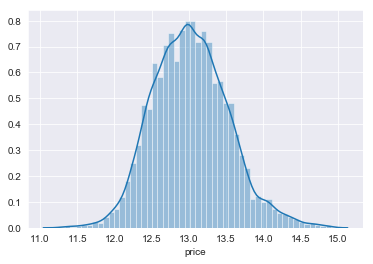

In [180]:
sns.distplot(np.log(cleaned_df['price']));

# Second Pricing Model

In [181]:
df_model_2 = cleaned_df.copy()


df_model_2 = df_model_2.drop(['id',
                                    'date',
                                    'lat',
                                    'long',
                                    'sqft_above',
                                    'bathroom_bins',
                                    'bedroom_bins',
                                    'grade_bins',
                                    'cond_bins',
                                    'floor_bins',
                                    'view_binar',
                                    'basement_binar',
                                    'count',
                                    'city'], axis=1)

print(len(df_model_2.columns))
df_model_2.head()

31


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         0.0   
1  538000.0         3       2.25         2570      7242     2.0         0.0   
2  180000.0         2       1.00          770     10000     1.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   
4  510000.0         3       2.00         1680      8080     1.0         0.0   

   view  condition  grade  sqft_basement  yr_built  yr_renovated  zipcode  \
0   0.0          3      7            0.0      1955           0.0    98178   
1   0.0          3      7          400.0      1951        1991.0    98125   
2   0.0          3      6            0.0      1933        1800.0    98028   
3   0.0          5      7          910.0      1965           0.0    98136   
4   0.0          3      8            0.0      1987           0.0    98074   

   sqft_living15  sqft_lot15  built_yrs_ago  city_population  zip_population  \
0           1340        5650             59           837792           24092   
1           1690        7639             63           837792           37081   
2           2720        8062             82            20419           20419   
3           1360        5000             49           837792           14770   
4           1800        7503             28            46463           25748   

   transactions  sale_capita_city  resale  flipped  renovated   logprice  \
0          8973          0.010710     0.0      0.0        0.0  12.309982   
1          8973          0.010710     0.0      0.0        1.0  13.195614   
2           283          0.013860     0.0      0.0        0.0  12.100712   
3          8973          0.010710     0.0      0.0        0.0  13.311329   
4           800          0.017218     0.0      0.0        0.0  13.142166   

   logsqft_living  logsqft_lot  logsqft_living15  logsqft_lot15  logcity_pop  \
0        7.073270     8.639411          7.200425       8.639411    13.638525   
1        7.851661     8.887653          7.432484       8.941022    13.638525   
2        6.646391     9.210340          7.908387       8.994917     9.924221   
3        7.580700     8.517193          7.215240       8.517193    13.638525   
4        7.426549     8.997147          7.495542       8.923058    10.746412   

   logzip_pop  
0   10.089635  
1   10.520860  
2    9.924221  
3    9.600353  
4   10.156112

In [182]:
outcome = 'price'
predictors = df_model_2.drop(['price', 'sqft_basement', 'yr_renovated'], axis=1).columns
pred_sum = '+'.join(predictors)
formula1 = outcome + '~' + pred_sum
formula1

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+yr_built+zipcode+sqft_living15+sqft_lot15+built_yrs_ago+city_population+zip_population+transactions+sale_capita_city+resale+flipped+renovated+logprice+logsqft_living+logsqft_lot+logsqft_living15+logsqft_lot15+logcity_pop+logzip_pop'

## Initiate Second Model

In [183]:
second_model = ols(formula=formula1, data=df_model_2).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     6467.
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:04:37   Log-Likelihood:            -2.6594e+05
No. Observations:               20585   AIC:                         5.319e+05
Df Residuals:                   20556   BIC:                         5.322e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.434e+06   4.21e+06     -0.816      0.415   -1.17e+07    4.82e+06
bedrooms           775.0507   1144.976      0.677      0.498   -1469.194    3019.295
bathrooms         1.137e+04   1755.856      6.473      0.000    7924.368    1.48e+04
sqft_living        198.0653      4.034     49.099      0.000     190.158     205.972
sqft_lot            -1.3032      0.163     -7.973      0.000      -1.624      -0.983
floors            2477.5477   1855.274      1.335      0.182   -1158.937    6114.033
waterfront        7.757e+04   6360.201     12.195      0.000    6.51e+04       9e+04
view              1.919e+04   1157.936     16.576      0.000    1.69e+04    2.15e+04
condition          614.3069   1203.292      0.511      0.610   -1744.241    2972.855
grade             1.279e+04   1184.717     10.800      0.000    1.05e+04    1.51e+04
yr_built          3159.6483   1488.395      2.123      0.034     242.276    6077.021
zipcode            -54.1702     31.301     -1.731      0.084    -115.523       7.182
sqft_living15      107.4864      6.182     17.387      0.000      95.369     119.604
sqft_lot15          -0.5478      0.169     -3.249      0.001      -0.878      -0.217
built_yrs_ago     3541.7274   1488.524      2.379      0.017     624.102    6459.353
city_population      1.3858      0.092     15.032      0.000       1.205       1.567
zip_population       0.6595      0.244      2.704      0.007       0.181       1.137
transactions      -132.4677      8.732    -15.170      0.000    -149.584    -115.352
sale_capita_city -8.446e+05   5.35e+05     -1.579      0.114   -1.89e+06    2.04e+05
resale            3542.8938   8028.327      0.441      0.659   -1.22e+04    1.93e+04
flipped          -2.783e+04   1.03e+04     -2.705      0.007    -4.8e+04   -7667.393
renovated         2.346e+04   4214.971      5.566      0.000    1.52e+04    3.17e+04
logprice          5.293e+05   2656.226    199.274      0.000    5.24e+05    5.35e+05
logsqft_living   -3.839e+05   8173.526    -46.967      0.000      -4e+05   -3.68e+05
logsqft_lot       1.814e+04   3425.088      5.297      0.000    1.14e+04    2.49e+04
logsqft_living15 -2.425e+05   1.23e+04    -19.695      0.000   -2.67e+05   -2.18e+05
logsqft_lot15     1.056e+04   3547.442      2.976      0.003    3602.587    1.75e+04
logcity_pop       4603.1976   2416.557      1.905      0.057    -133.446    9339.841
logzip_pop        -3.19e+04   7350.737     -4.340      0.000   -4.63e+04   -1.75e+04
==============================================================================
Omnibus:                    16153.213   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           657344.410
Skew:                           3.442   Prob(JB):                         0.00
Kurtosis:                      29.814   Cond. N

## Residuals Observations

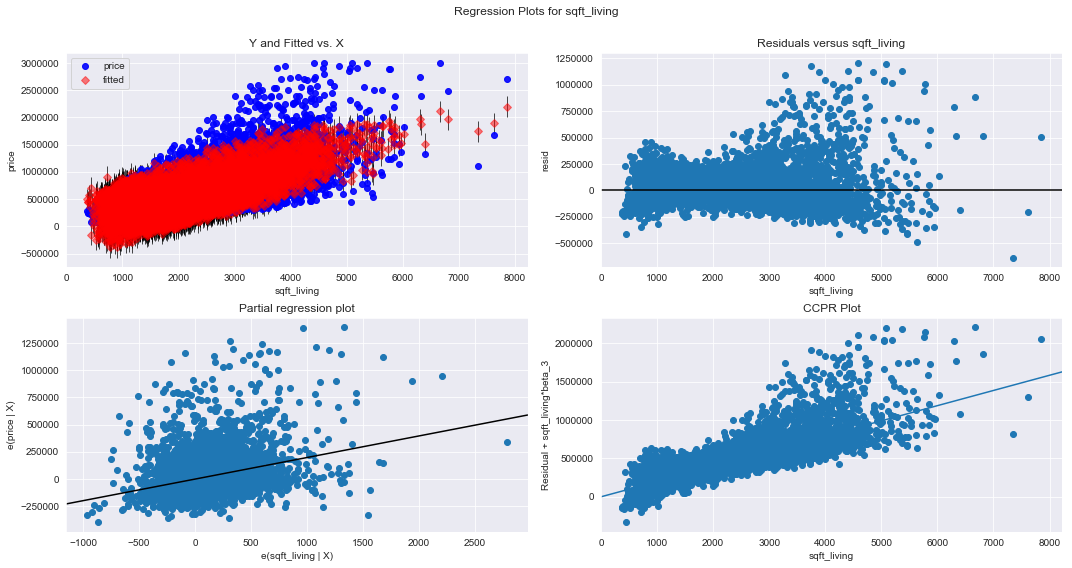

In [184]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(second_model, 'sqft_living', fig=fig)
plt.show()

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


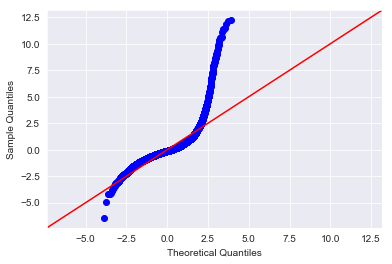

In [185]:
residuals = second_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [186]:
data = df_model_2
y = data[['price']]
X = data.drop(['price'], axis=1)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

16468 4117 16468 4117


In [188]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    9.970413e+09
dtype: float64
Test Mean Squarred Error: price    8.854392e+09
dtype: float64


In [189]:
print('Price Prediction Error:', round(np.sqrt(mse_train), 2))
print('Price Prediction Error:', round(np.sqrt(mse_test), 2))

Price Prediction Error: price    99851.96
dtype: float64
Price Prediction Error: price    94097.78
dtype: float64


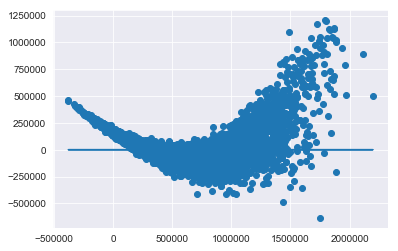

In [190]:
plt.scatter(second_model.predict(df_model_2[predictors]), second_model.resid)
plt.plot(second_model.predict(df_model_2[predictors]), [0 for i in range(len(df_model_2))]);

# Bin Model Optimization

## Log Transformations

In [191]:
# log_scale_df = pd.DataFrame([])

cleaned_df['logprice'] = np.log(cleaned_df['price'])
cleaned_df['logsqft_living'] = np.log(cleaned_df['sqft_living'])
cleaned_df['logsqft_lot'] = np.log(cleaned_df['sqft_lot'])
cleaned_df['logsqft_living15'] = np.log(cleaned_df['sqft_living15'])
cleaned_df['logsqft_lot15'] = np.log(cleaned_df['sqft_lot15'])
cleaned_df['logcity_pop'] = np.log(cleaned_df['city_population'])
cleaned_df['logzip_pop'] = np.log(cleaned_df['zip_population'])

cleaned_df.head(10)

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   
5  1321400060 2014-06-27  257500.0         3       2.25         1715   
6  2008000270 2015-01-15  291850.0         3       1.50         1060   
7  2414600126 2015-04-15  229500.0         3       1.00         1780   
8  3793500160 2015-03-12  323000.0         3       2.50         1890   
9  1736800520 2015-04-03  662500.0         3       2.50         3560   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   
5      6819     2.0         0.0   0.0          3      7        1715   
6      9711     1.0         0.0   0.5          3      7        1060   
7      7470     1.0         0.0   0.0          3      7        1050   
8      6560     2.0         0.0   0.0          3      7        1890   
9      9796     1.0         0.0   0.0          3      8        1860   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
1          400.0      1951        1991.0    98125  47.7210 -122.319   
2            0.0      1933        1800.0    98028  47.7379 -122.233   
3          910.0      1965           0.0    98136  47.5208 -122.393   
4            0.0      1987           0.0    98074  47.6168 -122.045   
5            1.0      1995           0.0    98003  47.3097 -122.327   
6            0.0      1963           0.0    98198  47.4095 -122.315   
7          730.0      1960           0.0    98146  47.5123 -122.337   
8            0.0      2003           0.0    98038  47.3684 -122.031   
9         1700.0      1965           0.0    98007  47.6007 -122.145   

   sqft_living15  sqft_lot15 bathroom_bins bedroom_bins grade_bins  \
0           1340        5650   1_5_or_less    3_or_less          7   
1           1690        7639        2_to_3    3_or_less          7   
2           2720        8062   1_5_or_less    3_or_less  6_or_less   
3           1360        5000     3_or_more    4_or_more          7   
4           1800        7503        2_to_3    3_or_less          8   
5           2238        6819        2_to_3    3_or_less          7   
6           1650        9711   1_5_or_less    3_or_less          7   
7           1780        8113   1_5_or_less    3_or_less          7   
8           2390        7570        2_to_3    3_or_less          7   
9           2210        8925        2_to_3    3_or_less          8   

     cond_bins floor_bins  view_binar  basement_binar  built_yrs_ago  count  \
0            3    1_floor           0               0             59      1   
1            3  2_or_more           0               1             63      1   
2            3    1_floor           0               0             82      1   
3  more_than_3    1_floor           0               1             49      1   
4            3    1_floor           0               0             28      1   
5            3  2_or_more           0               0             19      1   
6            3    1_floor           1               0             52      1   
7            3    1_floor           0               1             55      1   
8            3  2_or_more           0               0             12      1   
9            3    1_floor           0               1             50      1   

     city  ci

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AABB2A860>,
      dtype=object)

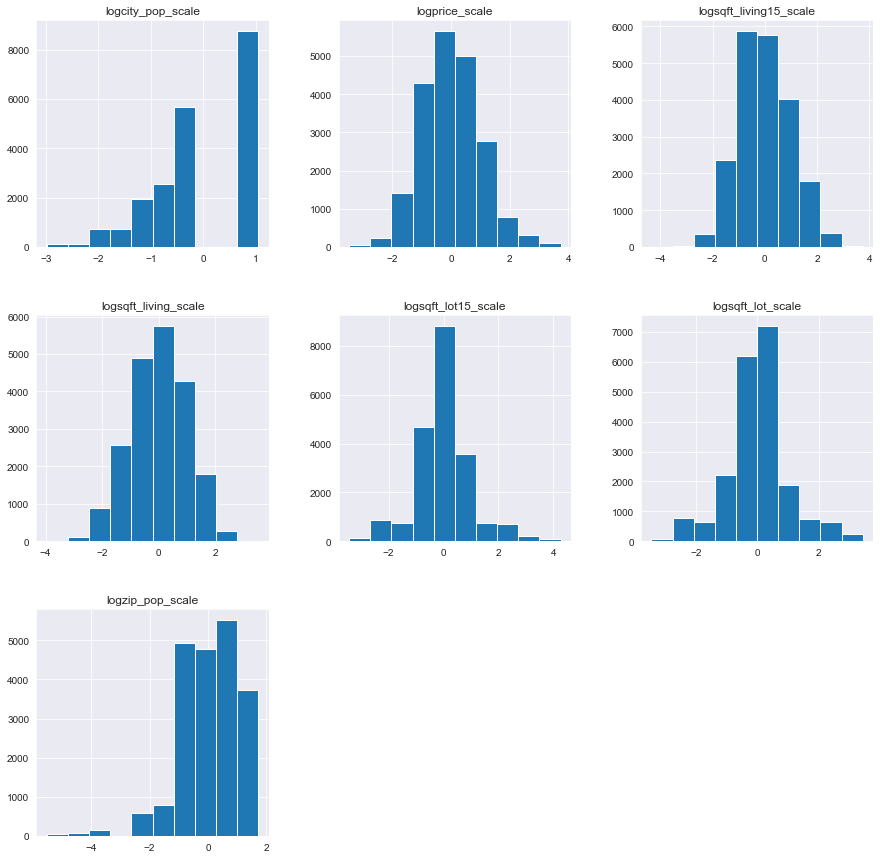

In [192]:
log_scale_df = pd.DataFrame([])

price = cleaned_df['price']
sqft_living = cleaned_df['sqft_living']
sqft_lot = cleaned_df['sqft_lot']
sqft_living15 = cleaned_df['sqft_living15']
sqft_lot15 = cleaned_df['sqft_lot15']
city = cleaned_df['city_population']
zip_ = cleaned_df['zip_population']

logprice = np.log(price)
logsqft_living = np.log(sqft_living)
logsqft_lot = np.log(sqft_lot)
logsqft_living15 = np.log(sqft_living15)
logsqft_lot15 = np.log(sqft_lot15)
logcity_pop = np.log(city)
logzip_pop = np.log(zip_)

log_scale_df['logprice_scale'] = (logprice - np.mean(logprice)) / np.sqrt(np.var(logprice))
log_scale_df['logsqft_living_scale'] = (logsqft_living - np.mean(logsqft_living)) / np.sqrt(np.var(logsqft_living))
log_scale_df['logsqft_lot_scale'] = (logsqft_lot - np.mean(logsqft_lot)) / np.sqrt(np.var(logsqft_lot))
log_scale_df['logsqft_living15_scale'] = (logsqft_living15 - np.mean(logsqft_living15)) / np.sqrt(np.var(logsqft_living15))
log_scale_df['logsqft_lot15_scale'] = (logsqft_lot15 - np.mean(logsqft_lot15)) / np.sqrt(np.var(logsqft_lot15))
log_scale_df['logcity_pop_scale'] = (logcity_pop - np.mean(logcity_pop)) / np.sqrt(np.var(logcity_pop))
log_scale_df['logzip_pop_scale'] = (logzip_pop - np.mean(logzip_pop)) / np.sqrt(np.var(logzip_pop))

log_scale_df.hist(figsize=(15,15))

# scaled_acc = (acc - min(acc)) / (max(acc) - min(acc))
# scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
# scaled_weight = (logweight - np.mean(logweight)) / np.sqrt(np.var(logweight))
# scaled_horse = (loghorse - np.mean(loghorse)) / (max(loghorse) - min(loghorse))


# log_scale_df['scaled_sqft_living'] = (sqft_living - min(sqft_living)) / (max(sqft_living) - min(sqft_living))
# log_scale_df['scaled_sqft_lot'] = (sqft_lot - min(sqft_lot)) / (max(sqft_lot) - min(sqft_lot))
# log_scale_df['scaled_sqft_living15'] = (sqft_living15 - min(sqft_living15)) / (max(sqft_living15) - min(sqft_living15))
# log_scale_df['scaled_sqft_lot15'] = (sqft_lot15 - min(sqft_lot15)) / (max(sqft_lot15) - min(sqft_lot15))
# log_scale_df['scaled_city'] = (city - min(city)) / (max(city) - min(city))
# log_scale_df['scaled_zip'] = (zip_ - min(zip_)) / (max(zip_) - min(zip_))



## Bin Dummies

In [193]:
bathroom_bin_dummies = pd.get_dummies(cleaned_df['bathroom_bins'], prefix='bath_bins', drop_first=True)
bedroom_bin_dummies = pd.get_dummies(cleaned_df['bedroom_bins'], prefix='bed_bins', drop_first=True)
grade_bin_dummies = pd.get_dummies(cleaned_df['grade_bins'], prefix='grade_bins', drop_first=True)
cond_bin_dummies = pd.get_dummies(cleaned_df['cond_bins'], prefix='cond_bins', drop_first=True)
flr_bin_dummies = pd.get_dummies(cleaned_df['floor_bins'], prefix='flr_bins', drop_first=True)
city_dummies = pd.get_dummies(cleaned_df['city'], prefix='cty', drop_first=True)

In [194]:
df_bin_model = cleaned_df.copy()

df_bin_model = df_bin_model.drop(['id',
                                    'date',
                                    'lat',
                                    'long',
                                    'sqft_above',
                                    'bathrooms',
                                    'bedrooms',
                                    'grade',
                                    'condition',
                                    'floors',
                                    'view',
                                    'waterfront',
                                    'sqft_basement',
                                    'count',
                                    'yr_renovated',
                                    'yr_built',
                                    'zipcode',
                                    'bathroom_bins',
                                    'bedroom_bins',
                                    'grade_bins',
                                    'cond_bins',
                                    'floor_bins',
                                    'count',
                                    'city',
                                    'zip_population',
                                    'city_population',
                                    'flipped',
                                    'price',
                                    'sqft_living',
                                    'sqft_lot',
                                    'sqft_living15',
                                    'sqft_lot15',
                                    'transactions',
                                    'sale_capita_city'],
                                     axis=1)

df_bin_model = pd.concat([df_bin_model,
                          grade_bin_dummies,
                          cond_bin_dummies,
                          bathroom_bin_dummies,
                          bedroom_bin_dummies,
                          flr_bin_dummies,
                          city_dummies],
                          axis=1)

df_bin_model.columns = [x.replace('.', '_') for x in df_bin_model]

df_bin_model.head()

view_binar  basement_binar  built_yrs_ago  resale  renovated   logprice  \
0           0               0             59     0.0        0.0  12.309982   
1           0               1             63     0.0        1.0  13.195614   
2           0               0             82     0.0        0.0  12.100712   
3           0               1             49     0.0        0.0  13.311329   
4           0               0             28     0.0        0.0  13.142166   

   logsqft_living  logsqft_lot  logsqft_living15  logsqft_lot15  logcity_pop  \
0        7.073270     8.639411          7.200425       8.639411    13.638525   
1        7.851661     8.887653          7.432484       8.941022    13.638525   
2        6.646391     9.210340          7.908387       8.994917     9.924221   
3        7.580700     8.517193          7.215240       8.517193    13.638525   
4        7.426549     8.997147          7.495542       8.923058    10.746412   

   logzip_pop  grade_bins_7  grade_bins_8  grade_bins_9  \
0   10.089635             1             0             0   
1   10.520860             1             0             0   
2    9.924221             0             0             0   
3    9.600353             1             0             0   
4   10.156112             0             1             0   

   grade_bins_more_than_10  cond_bins_3  cond_bins_more_than_3  \
0                        0            1                      0   
1                        0            1                      0   
2                        0            1                      0   
3                        0            0                      1   
4                        0            1                      0   

   bath_bins_2_to_3  bath_bins_3_or_more  bed_bins_4_or_more  \
0                 0                    0                   0   
1                 1                    0                   0   
2                 0                    0                   0   
3                 0                    1                   1   
4                 1                    0                   0   

   flr_bins_2_or_more  flr_bins_split  cty_BELLEV  cty_BLACK  cty_BOTHEL  \
0                   0               0           0          0           0   
1                   1               0           0          0           0   
2                   0               0           0          0           0   
3                   0               0           0          0           0   
4                   0               0           0          0           0   

   cty_CARNAT  cty_DUVALL  cty_ENUMCL  cty_FALLC  cty_FEDERA  cty_ISSAQU  \
0           0           0           0          0           0           0   
1           0           0           0          0           0           0   
2           0           0           0          0           0           0   
3           0           0           0          0           0           0   
4           0           0           0          0           0           0   

   cty_KENMOR  cty_KENT  cty_KIRKLA  cty_MAPLE  cty_MEDINA  cty_MERCER  \
0           0         0           0          0           0           0   
1           0         0           0          0           0           0   
2           1         0           0          0           0           0   
3           0         0           0          0           0           0   
4           0         0           0          0           0           0   

   cty_NORTH  cty_REDMON  cty_RENTON  cty_SAMMAM  cty_SEATTL  cty_SNOQUA  \
0          0           0           0           0           1           0   
1          0           0           0           0           1           0   
2          0           0           0           0           0           0   
3          0           0           0           0           1           0   
4          0           0           0           1           0           0   

   cty_VASHON  cty_WOODIN  
0           0           0  
1           0           0  
2           0   

In [197]:
outcome = 'logprice'
predictors = df_bin_model.drop(['logprice',
                                'logcity_pop',
                                'logzip_pop',
                                'logsqft_lot',
                                'basement_binar',
                                'cty_FEDERA',
                                'cty_KENT'], axis=1).columns
# df_bin_model.drop(['logprice',
#                                 'cty_KENT',
#                                 'cty_ENUMCL',
#                                 'cty_RENTON',
#                                 'cty_MAPLE',
#                                 'cty_CARNAT',
#                                 'cty_BLACK',
#                                 'cty_FEDERA'],
#                                axis=1).columns

pred_sum = '+'.join(predictors)
formula1 = outcome + '~' + pred_sum
formula1

'logprice~view_binar+built_yrs_ago+resale+renovated+logsqft_living+logsqft_living15+logsqft_lot15+grade_bins_7+grade_bins_8+grade_bins_9+grade_bins_more_than_10+cond_bins_3+cond_bins_more_than_3+bath_bins_2_to_3+bath_bins_3_or_more+bed_bins_4_or_more+flr_bins_2_or_more+flr_bins_split+cty_BELLEV+cty_BLACK+cty_BOTHEL+cty_CARNAT+cty_DUVALL+cty_ENUMCL+cty_FALLC+cty_ISSAQU+cty_KENMOR+cty_KIRKLA+cty_MAPLE+cty_MEDINA+cty_MERCER+cty_NORTH+cty_REDMON+cty_RENTON+cty_SAMMAM+cty_SEATTL+cty_SNOQUA+cty_VASHON+cty_WOODIN'

## Initiate Bin Model

In [198]:
bin_model = ols(formula=formula1, data=df_bin_model).fit()
bin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     1770.
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:05:47   Log-Likelihood:                -64.448
No. Observations:               20585   AIC:                             208.9
Df Residuals:                   20545   BIC:                             526.2
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   8.0019      0.071    112.430      0.000       7.862       8.141
view_binar                  0.1291      0.006     20.335      0.000       0.117       0.142
built_yrs_ago               0.0033   9.75e-05     33.492      0.000       0.003       0.003
resale                      0.1046      0.019      5.537      0.000       0.068       0.142
renovated                   0.0652      0.010      6.491      0.000       0.046       0.085
logsqft_living              0.3585      0.009     41.135      0.000       0.341       0.376
logsqft_living15            0.2441      0.009     26.417      0.000       0.226       0.262
logsqft_lot15              -0.0666      0.003    -20.070      0.000      -0.073      -0.060
grade_bins_7                0.1878      0.007     28.657      0.000       0.175       0.201
grade_bins_8                0.3388      0.008     41.703      0.000       0.323       0.355
grade_bins_9                0.5160      0.010     50.586      0.000       0.496       0.536
grade_bins_more_than_10     0.6845      0.013     54.576      0.000       0.660       0.709
cond_bins_3                 0.1722      0.018      9.334      0.000       0.136       0.208
cond_bins_more_than_3       0.2379      0.018     12.884      0.000       0.202       0.274
bath_bins_2_to_3            0.0342      0.005      6.351      0.000       0.024       0.045
bath_bins_3_or_more         0.1123      0.009     13.098      0.000       0.096       0.129
bed_bins_4_or_more         -0.0311      0.004     -7.316      0.000      -0.039      -0.023
flr_bins_2_or_more          0.0605      0.005     11.974      0.000       0.051       0.070
flr_bins_split              0.0589      0.007      9.018      0.000       0.046       0.072
cty_BELLEV                  0.6747      0.008     79.711      0.000       0.658       0.691
cty_BLACK                   0.2973      0.027     10.929      0.000       0.244       0.351
cty_BOTHEL                  0.3900      0.018     21.386      0.000       0.354       0.426
cty_CARNAT                  0.3652      0.026     13.920      0.000       0.314       0.417
cty_DUVALL                  0.3238      0.020     16.495      0.000       0.285       0.362
cty_ENUMCL                  0.0439      0.019      2.360      0.018       0.007       0.080
cty_FALLC                   0.4570      0.036     12.600      0.000       0.386       0.528
cty_ISSAQU                  0.4684      0.011     44.283      0.000       0.448       0.489
cty_KENMOR                  0.3662      0.015     23.854      0.000       0.336       0.396
cty_KIRKLA                  0.5917      0.009     64.296      0.000       0.574       0.610
cty_MAPLE                   0.1444      0.012     12.534      0.000       0.122       0.167
cty_MEDINA                  1.1671      0.040  

## Bin Model Results Observations

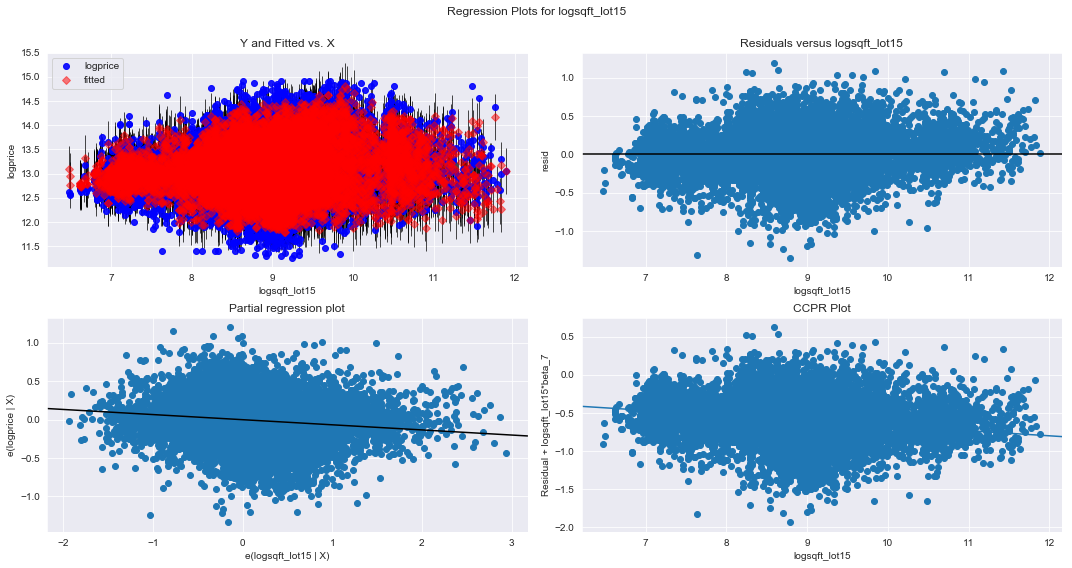

In [199]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(bin_model, 'logsqft_lot15', fig=fig)
plt.show()

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


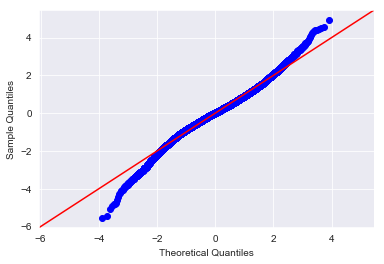

In [200]:
residuals = bin_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [201]:
data = df_bin_model
y = data[['logprice']]
X = data.drop(['logprice'], axis=1)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

16468 4117 16468 4117


In [203]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: logprice    0.059048
dtype: float64
Test Mean Squarred Error: logprice    0.057793
dtype: float64


In [204]:
real_y_hat_test_list= np.exp(y_hat_test)

In [205]:
real_y_test_list = np.exp(y_test)

In [206]:
mse_test = np.sum((real_y_test_list-real_y_hat_test_list)**2)/len(real_y_test_list)
round(np.sqrt(mse_test), 2)

logprice    154377.68
dtype: float64

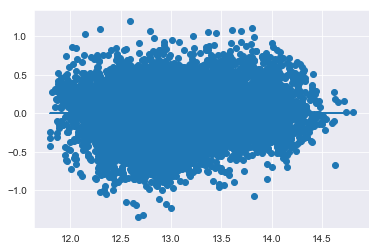

In [207]:
plt.scatter(bin_model.predict(df_bin_model[predictors]), bin_model.resid)
plt.plot(bin_model.predict(df_bin_model[predictors]), [0 for i in range(len(df_bin_model))]);

In [208]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.059401267611291816
-0.0593458445074347
-0.059156512292326505
